### CM4603 – Coursework 1 (Group F)
#### November 2024

### Group: <F>

Name 1: < Nethari Jayasinghe > |
IIT ID: < 20210931 > |
RGU ID: < 2118527 >

Name 2: < Pooja Illangarathne > |
IIT ID: < 20210435 > |
RGU ID: < 2117529 >

Name 3: < A.B.Duweeja De Lima > |
IIT ID: < 20210522 > |
RGU ID: < 2117517 >

Data Collection:

*Used the Apify API (TripAdvisor Reviews Actor) to scrape English-only reviews*

Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os

In [ ]:
# Folder path for collected datasets in Google Drive
folder_path = '/content/drive/MyDrive/NLP_Datasets'

In [ ]:
# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Storing all DataFrames in an empty list
dataframes = []

# Loop over each file and read it into a DataFrame, then append to the list
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

*This code combines multiple CSV files in a folder into a single Pandas DataFrame, main_df. It reads each CSV, stores it as a DataFrame.*

In [ ]:
# Concatenate all DataFrames
main_df = pd.concat(dataframes, ignore_index=True)

*The pd.concat function concatenates all the DataFrames in the dataframes list into a single DataFrame, main_df.*

In [ ]:
# List of all columns needed for further tasks
columns_to_keep = ["id", "locationId", "placeInfo", "rating", "text", "title", "tripType"]

# Filtering the DataFrame
main_df = main_df[columns_to_keep]

# Display the resulting DataFrame
main_df.head()


,id,locationId,placeInfo,rating,text,title,tripType
0,978308991,14033359,"{'id': '14033359', 'name': 'Le Grand Galle', '...",4,"As the other reviews state, it's a beautiful h...",Beautiful and well located,FAMILY
1,978088291,14033359,"{'id': '14033359', 'name': 'Le Grand Galle', '...",5,"This was such a lovely hotel, and the view was...",Great stay!,FAMILY
2,978084110,14033359,"{'id': '14033359', 'name': 'Le Grand Galle', '...",5,"Stay was absolutely perfect, staff were friend...",Perfect place in Galle,SOLO
3,976805351,14033359,"{'id': '14033359', 'name': 'Le Grand Galle', '...",3,Our stay at Le Grand Galle Hotel was generally...,It was a nice stay but...,COUPLES
4,974607870,14033359,"{'id': '14033359', 'name': 'Le Grand Galle', '...",5,All staff members are very friendly and suppor...,Stay at le grand galle.,COUPLES


*This code refines the dataset by keeping only the necessary columns for further processing or analysis. It outputs a concise and clean DataFrame containing key details like IDs, location information, ratings, review text, titles, and trip types. This step ensures that the dataset is focused and free of extraneous information.*

### Answer to Task 1


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 11.9 MB/s eta 0:00:00


In [ ]:
import re
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloading stopwords and wordnet if needed
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = emoji.demojize(text)  # Replace emojis with descriptive text like 'smiling_face'
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s:]', '', text)  # Remove non-alphanumeric characters except colons for emoji descriptions
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(words)

main_df['cleaned_text'] = main_df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


*The code preprocesses raw text data by:*

*Removing noise (e.g., emojis, special characters, stopwords).
Normalizing (lowercasing, lemmatizing).
Creating a clean, structured version of the text in the cleaned_text column. This prepares the data for subsequent tasks such as sentiment analysis, topic modeling, or machine learning.*

 *Processes the 'text' column in main_df and creates a cleaned version in a new column cleaned_text*

Data Describe

In [ ]:
print(f"Number of DataFrames loaded: {len(dataframes)}")

Number of DataFrames loaded: 19


In [ ]:
for i, df in enumerate(dataframes, 1):
    print(f"DataFrame {i}: {df.shape[0]} rows, {df.shape[1]} columns")

DataFrame 1: 564 rows, 18 columns
DataFrame 2: 344 rows, 18 columns
DataFrame 3: 479 rows, 18 columns
DataFrame 4: 609 rows, 18 columns
DataFrame 5: 314 rows, 18 columns
DataFrame 6: 690 rows, 18 columns
DataFrame 7: 398 rows, 18 columns
DataFrame 8: 274 rows, 18 columns
DataFrame 9: 239 rows, 18 columns
DataFrame 10: 154 rows, 18 columns
DataFrame 11: 791 rows, 18 columns
DataFrame 12: 193 rows, 18 columns
DataFrame 13: 198 rows, 18 columns
DataFrame 14: 223 rows, 18 columns
DataFrame 15: 344 rows, 18 columns
DataFrame 16: 179 rows, 18 columns
DataFrame 17: 47 rows, 18 columns
DataFrame 18: 292 rows, 18 columns
DataFrame 19: 46 rows, 18 columns


*The output provides an overview of the size of each DataFrame in a collection. All DataFrames are consistent in structure, having 18 columns, but the number of rows varies significantly, indicating variability in the data distribution across these DataFrames.*

In [ ]:
# Get the columns of the first DataFrame as a reference
reference_columns = dataframes[0].columns

# Check if columns are the same in all DataFrames
for i, df in enumerate(dataframes, 1):
    if not df.columns.equals(reference_columns):
        print(f"DataFrame {i} has different columns.")
        print("Columns:", df.columns)
    else:
        print(f"DataFrame {i} has the same columns.")


DataFrame 1 has the same columns.
DataFrame 2 has the same columns.
DataFrame 3 has the same columns.
DataFrame 4 has the same columns.
DataFrame 5 has the same columns.
DataFrame 6 has the same columns.
DataFrame 7 has the same columns.
DataFrame 8 has the same columns.
DataFrame 9 has the same columns.
DataFrame 10 has the same columns.
DataFrame 11 has the same columns.
DataFrame 12 has the same columns.
DataFrame 13 has the same columns.
DataFrame 14 has the same columns.
DataFrame 15 has the same columns.
DataFrame 16 has the same columns.
DataFrame 17 has the same columns.
DataFrame 18 has the same columns.
DataFrame 19 has the same columns.


*The code validates column consistency across multiple DataFrames. The output confirms that all DataFrames in the collection have identical columns, ensuring structural uniformity. This consistency is critical for concatenation or merging operations later.*

In [ ]:
main_df.shape

(6378, 8)

*Displays the shape of the main_df DataFrame, which includes the number of rows and columns.*

In [ ]:
num_hotels = main_df['locationId'].nunique()
print(f"Number of hotels: {num_hotels}")

Number of hotels: 215


*Calculates the number of unique hotels in the dataset by finding the unique values in the locationId column using .nunique().*

In [ ]:
reviews_per_hotel = main_df.groupby('locationId')['id'].count()
print(reviews_per_hotel)

locationId
302888      58
304700      48
306376      50
306383      49
308529      50
            ..
25983119    49
26194654    50
26226338    58
26325123    21
28040522    47
Name: id, Length: 215, dtype: int64


*Groups the dataset by locationId and counts the number of reviews (id) for each hotel using .groupby() and .count().
The total output has 215 entries, matching the number of unique hotels.*

In [ ]:
total_words = main_df['cleaned_text'].str.split().apply(len).sum()
print(f"Total number of words: {total_words}")

Total number of words: 307714


*Splits the cleaned_text column into individual words using .str.split() and calculates the number of words for each review using .apply(len).
The total word count is obtained by summing all the word counts using .sum(). The dataset contains a total of 307,714 words across all reviews.*

In [ ]:
unique_words = set(" ".join(main_df['cleaned_text']).split())
num_unique_words = len(unique_words)
print(f"Number of unique words: {num_unique_words}")

Number of unique words: 16954


*The code calculates the number of unique words in the cleaned_text column of the dataset by concatenating all the text, splitting it into words, and using a set to remove duplicates. The output shows that the dataset contains 16,954 unique words, reflecting the diversity of the vocabulary after preprocessing.*

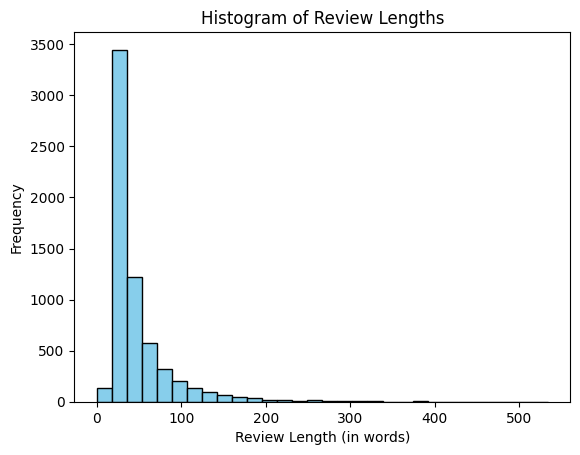

In [ ]:
import matplotlib.pyplot as plt

review_lengths = main_df['cleaned_text'].str.split().apply(len)
plt.hist(review_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Review Length (in words)')
plt.ylabel('Frequency')
plt.title('Histogram of Review Lengths')
plt.show()

*This image represents a histogram of review lengths, where the x-axis indicates the length of reviews (in words) and the y-axis indicates the frequency (how many reviews fall into each word count range).*

*Observations:*
1. *Skewed Distribution:*
   - *The histogram is heavily skewed to the left, indicating that most reviews are short in length.*
   - *The majority of reviews have fewer than 100 words.*

2. *Peak at Lower Word Count:*
   - *There is a very high frequency of reviews with word counts between 0 and approximately 50 words, shown by the tallest bar on the histogram.*
   - *This suggests that users tend to write concise reviews more often than lengthy ones.*

3. *Decreasing Frequency:*
   - *As the review length increases (e.g., 100–200 words), the frequency of reviews decreases sharply.*
   - *Very few reviews are longer than 200 words, with almost negligible frequency beyond 300 words.*

4. *Rare Long Reviews:*
   - *Reviews longer than 400 words are extremely rare, as represented by the almost flat tail on the right-hand side of the histogram.*


Tokenization

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Initializing CountVectorizer for word-level and bigram tokenization
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Word-Level (Unigram) and Bigram tokenization

# Apply vectorizer to the 'cleaned_text' column and create a new column for the tokenized data
def tokenize_and_add(df, column_name):
    # Transform the text data into a list of tokens (word-level and bigrams)
    tokens = vectorizer.fit_transform(df[column_name])
    # Convert the tokenized data into a readable format (list of tokens for each document)
    tokenized_data = [' '.join(tokens) for tokens in vectorizer.inverse_transform(tokens)]
    df['tokenized_text'] = tokenized_data  # Add the new tokenized data as a separate column
    return df

# Call the function to tokenize the cleaned text and add it as a new column
main_df = tokenize_and_add(main_df, 'cleaned_text')

*The function produces tokenized output combining unigrams (word level) and bigrams.*

*The cleaned_text column in main_df is processed, adding tokenized text as a new column.*

EDA

In [ ]:
import ast

# Convert placeInfo strings to dictionaries (if they are strings)
main_df['placeInfo'] = main_df['placeInfo'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Defining function to safely extract the values from placeInfo
def extract_info(row):
    if isinstance(row, dict):  # Check if the row is a dictionary
        name = row.get('name', None)
        city = row.get('addressObj', {}).get('city', None)  # Safe access to nested city
        return pd.Series([name, city])
    else:
        return pd.Series([None, None])  # Return None if placeInfo is not a dictionary

# Apply the function to placeInfo and store the results in new columns
main_df[['hotel_name', 'city']] = main_df['placeInfo'].apply(extract_info)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*The main_df DataFrame will have two new columns:*

* *hotel_name: Contains the name of the
hotel if it exists in the placeInfo dictionary; otherwise, None.*

* *city: Contains the city from the nested addressObj.city structure in placeInfo, or None if not available.*

*This came in useful to get the EDA*



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


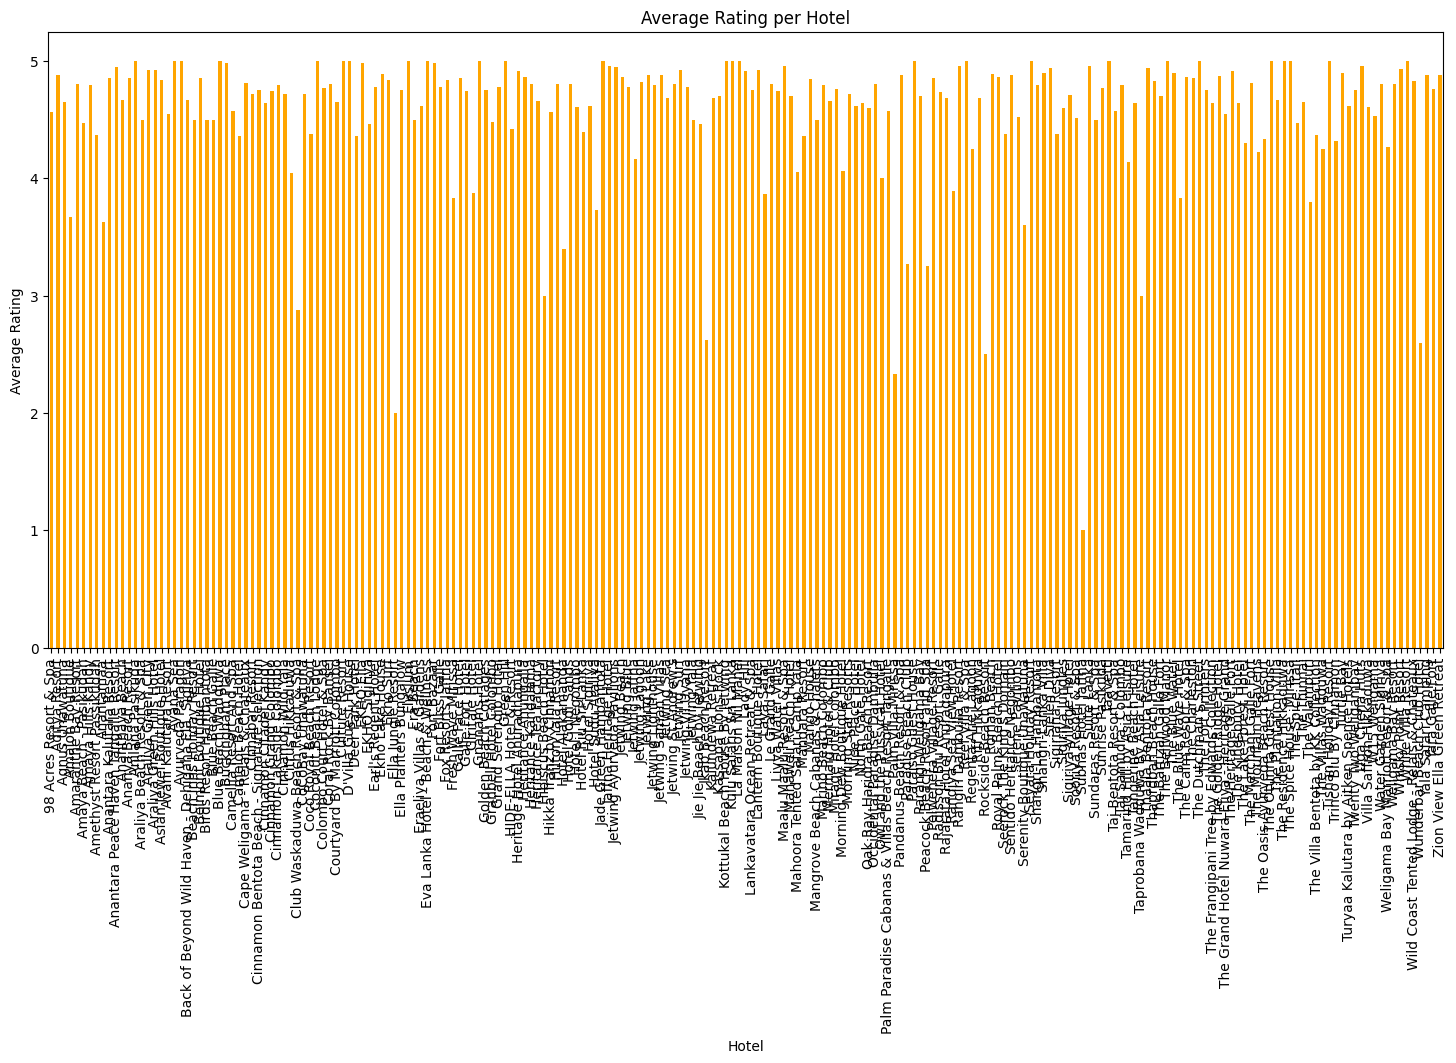

In [ ]:
avg_rating_per_hotel = main_df.groupby('hotel_name')['rating'].mean() # Getting the Average Rating for each Hotel
avg_rating_per_hotel.plot(kind='bar', figsize=(18, 8), color='orange')
plt.xlabel('Hotel')
plt.ylabel('Average Rating')
plt.title('Average Rating per Hotel')
plt.show()


*This bar chart visualizes the average ratings for each hotel in the dataset.*

1. *X-Axis (Hotels):*
   - *Represents individual hotels in the dataset. Each hotel is labeled, but due to the large number of hotels, the labels appear densely packed and may be hard to read.*

2. *Y-Axis (Average Rating):*
   - *Displays the average rating given to each hotel. Ratings range from 0 to 5.*

3. *Bars:*
   - *The height of each bar corresponds to the average rating for that hotel.*

*Observations:*
- *Most hotels have high average ratings (close to 4 or 5), indicating overall positive feedback from guests.*
- *A few hotels have noticeably lower average ratings, potentially reflecting poor customer experiences or dissatisfaction.*
- *The distribution suggests that higher ratings dominate, with only a small number of hotels rated poorly.*

*This chart provides a detailed overview of how hotels are rated based on guest reviews. The overall trend indicates positive feedback for the majority of hotels, with only a few exceptions receiving low average ratings. However, due to the density of data, a more focused view (e.g., filtering hotels by region or a specific range of ratings) may be needed for better interpretability.*

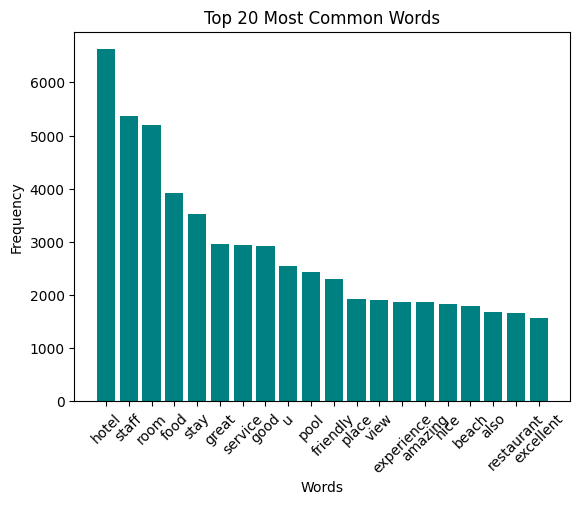

In [ ]:
from collections import Counter

word_counts = Counter(" ".join(main_df['cleaned_text']).split()) # Split individual words of all review in to a list, Frequency calculated
common_words = word_counts.most_common(20) # Finding Top 20 occuring words
words, counts = zip(*common_words)  # Separate the words and their frequencies into two tuples

plt.bar(words, counts, color='teal')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.show()


*This bar chart displays the top 20 most common words found in the dataset of reviews.*

1. *X-Axis: Represents the words (e.g., "hotel", "staff", "room", etc.).*
2. *Y-Axis: Indicates the frequency of each word in the dataset.*
3. *Bars: Each bar represents a word and its corresponding frequency. Taller bars indicate higher word frequencies.*

*Observations:*
- *The most frequently occurring word is "hotel", followed by "staff" and "room". This aligns with the context of the dataset, which likely involves reviews about hotels and their facilities.*
- *Other high-frequency words include "food," "stay," and "service," reflecting key aspects people mention in their reviews.*
- *Positive adjectives like "great," "good," "friendly," and "excellent" suggest that reviews contain a lot of favorable sentiments.*

*The chart provides insights into the most frequently discussed aspects in the review dataset. It highlights topics related to hotel stays, staff, rooms, and food, with a mix of service and location-related terms. This visualization helps identify dominant themes and common language used in the reviews, useful for further analysis like sentiment or topic modeling.*

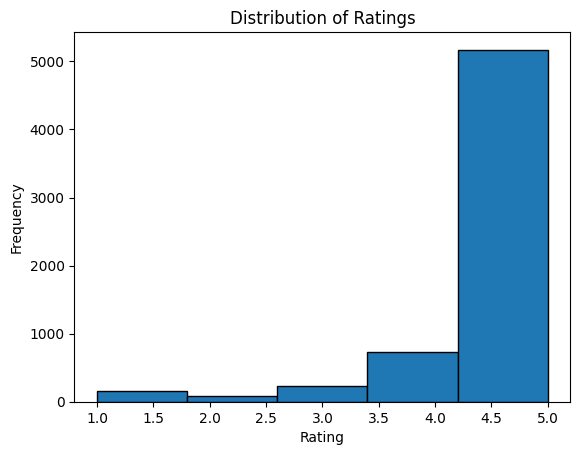

In [ ]:
main_df['rating'].plot(kind='hist', bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


*This histogram shows the distribution of ratings, with the x-axis representing the rating values (from 1.0 to 5.0) and the y-axis representing the frequency of each rating.*

*Key Observations:*
1. *High Ratings Dominate:*
   - *The majority of reviews have ratings close to 4.5 or 5.0, indicating that users mostly gave very positive feedback.*
2. *Few Low Ratings:*
   - *Ratings below 3.0 are rare, suggesting limited dissatisfaction among reviewers.*
3. *Skewed Distribution:*
   - *The distribution is right-skewed, heavily weighted towards higher ratings.*

*This pattern suggests an overall positive sentiment in the reviews, with most users expressing satisfaction.*

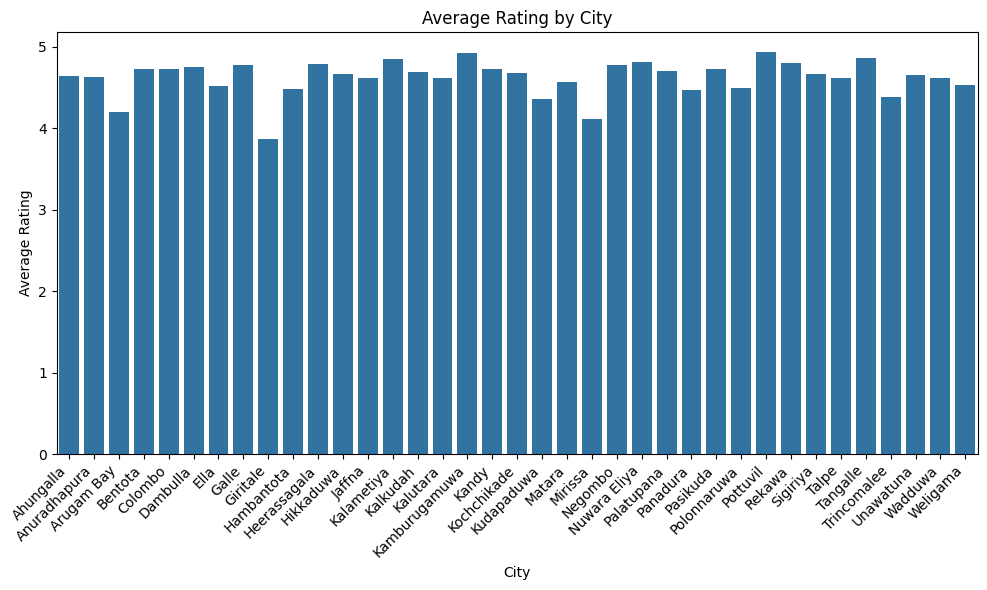

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# main_df has columns 'rating' and 'city'
# Average rating for each city is calculated
city_rating_avg = main_df.groupby('city')['rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='rating', data=city_rating_avg)

# Customize the plot
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Rating by City')
plt.xticks(rotation=45, ha='right')  # Rotate city names for readability
plt.tight_layout()

# Show the plot
plt.show()


*This bar chart represents the average ratings for hotels in different cities.*

1. *X-Axis: Lists the names of cities (e.g., "Anuradhapura," "Colombo," etc.).*
2. *Y-Axis: Indicates the average rating (on a scale of 0 to 5) for hotels in each city.*
3. *Bars: Each bar corresponds to a city and its associated average rating. Taller bars represent higher ratings.*

*Observations:*
- *Most cities have an average rating close to 5, indicating that hotels generally received very favorable reviews across cities.*
- *A few cities, such as Hambantota, show slightly lower ratings compared to others.*
- *The ratings are relatively consistent across the dataset, with no extreme outliers or very low ratings.*

*The chart suggests that hotel experiences in different cities are mostly positive, with average ratings clustering between 4 and 5. This consistency may indicate a generally high level of satisfaction among reviewers. The chart also highlights slight variations, such as Hambantota's lower average, which might warrant further investigation into specific hotel reviews or issues in that region.*

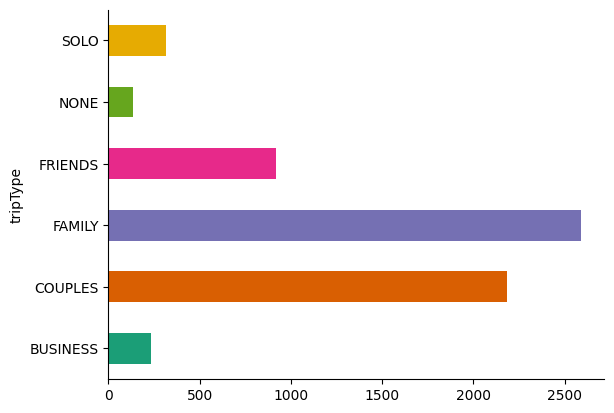

In [ ]:
main_df.groupby('tripType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

*This bar chart displays the distribution of trip types among the reviewers.*

1. *Y-Axis: Lists different trip types, such as:*
   - *SOLO: Trips taken alone.*
   - *NONE: Unspecified trip type.*
   - *FRIENDS: Trips taken with friends.*
   - *FAMILY: Trips taken with family.*
   - *COUPLES: Trips taken as couples.*
   - *BUSINESS: Trips taken for business purposes.*

2. *X-Axis: Represents the count of reviews for each trip type.*
3. *Bars: The length of each bar indicates the number of reviews associated with the corresponding trip type.*

*Observations:*
- *FAMILY trips dominate the chart with the highest number of reviews, followed closely by COUPLES trips.*
- *FRIENDS trips also have a notable number of reviews but are significantly fewer than FAMILY and COUPLES.*
- *BUSINESS and SOLO trips are comparatively less common.*
- *NONE (unspecified trip type) has very few reviews.*

*This chart highlights the popularity of trip types among reviewers:*
- *Most hotel reviews are related to FAMILY and COUPLES trips, suggesting hotels cater well to these demographics.*
- *SOLO and BUSINESS trips contribute minimally, potentially indicating fewer travelers in these categories or less emphasis on these types of trips by the hotels.*
- *The presence of NONE highlights a small portion of reviews with unclear trip types, which could be refined for better analysis.*

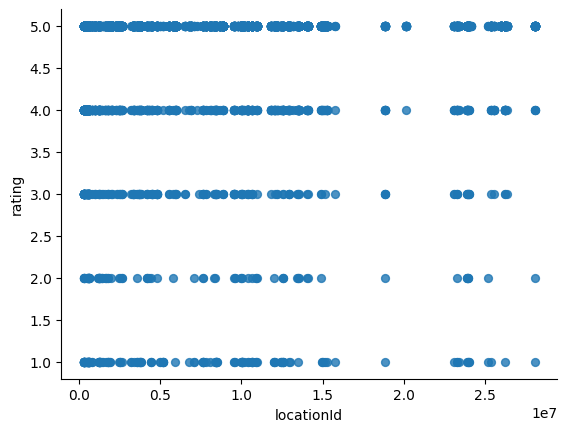

In [ ]:
from matplotlib import pyplot as plt
main_df.plot(kind='scatter', x='locationId', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


*This scatter plot visualizes the relationship between locationId and rating.*

1. *X-Axis (locationId): Represents unique IDs associated with different locations (e.g., hotels or geographic areas).*
2. *Y-Axis (rating): Represents the rating scores given by users, ranging from 1 to 5.*
3. *Data Points: Each dot corresponds to a review. Its position reflects the locationId on the x-axis and the rating on the y-axis.*

*Observations:*
- *Distribution:*
  - *Ratings are distributed across all levels (1 to 5), but certain ratings (like 4 and 5) appear more densely clustered, indicating that many locations receive higher ratings.*
- *Horizontal Clustering:*
  - *Ratings for each locationId are stacked horizontally, suggesting multiple reviews per location.*
- *Sparse Data for Some locationIds:*
  - *A few locationIds appear to have fewer reviews compared to others.*

*This scatter plot provides a clear overview of how ratings are distributed across different locations. Key takeaways:*
- *High Ratings (4-5) dominate the dataset, indicating generally positive reviews.*
- *Some locations have multiple ratings, while others have sparse data.*
- *There is no clear trend or correlation between locationId and rating, as locationId is likely categorical. This plot is more useful for spotting the density of ratings for each location.*

Explain the challenges encountered and the observations based on the output above

### Answer to Task 2

Describe the classification dataset, its dimensions, preprocessing steps, numbers of classes taken for classification, the which feature extraction techniques were performed.

In [ ]:
pip install scikit-learn

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Initializing VADER
vader_analyzer = SentimentIntensityAnalyzer()

# Defining function to classify sentiment using VADER
def classify_sentiment_vader(text):
    score = vader_analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Defining function to classify sentiment using TextBlob
def classify_sentiment_textblob(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Applying sentiment classifiers
main_df['vader_sentiment'] = main_df['cleaned_text'].apply(classify_sentiment_vader)
main_df['textblob_sentiment'] = main_df['cleaned_text'].apply(classify_sentiment_textblob)

# Applying Majority voting to determine sentiment label
def majority_vote(row):
    sentiments = [row['vader_sentiment'], row['textblob_sentiment']]
    return max(set(sentiments), key=sentiments.count)

main_df['sentiment'] = main_df.apply(majority_vote, axis=1)


*The code applies sentiment analysis using two methods: VADER and TextBlob. It classifies the sentiment of the cleaned_text column into "Positive," "Negative," or "Neutral" using each method. The results from both classifiers are then combined using majority voting to determine the final sentiment for each entry, which is stored in a new column called sentiment. The output consists of three sentiment-related columns: vader_sentiment, textblob_sentimen`, and the  sentiment, which reflects the majority sentiment from both methods. The sentiment column was built inorder to train the naive bayes model below as the dataset does not contain any pre sentiment labels (please note the final majority voting is done after naive bayes predictions).*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


# Vectorization
X = vectorizer.fit_transform(main_df['cleaned_text'])
y = main_df['sentiment']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9741379310344828

Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.14      0.24        36
     Neutral       0.00      0.00      0.00         1
    Positive       0.97      1.00      0.99      1239

    accuracy                           0.97      1276
   macro avg       0.60      0.38      0.41      1276
weighted avg       0.97      0.97      0.96      1276



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


*The model performs very well for positive sentiment prediction but struggles with negative and neutral sentiments, with almost no neutral predictions. This suggests that the model may be biased toward positive sentiment, likely due to an imbalanced dataset, where positive instances outnumber others significantly.*

*The Naive Bayes model achieves high overall accuracy (97.41%) due to excellent performance on the dominant Positive class (F1-score: 0.99). However, it struggles with the Negative class (F1-score: 0.24) and fails entirely on the Neutral class due to severe class imbalance. Improvements like addressing class imbalance (e.g., SMOTE) can enhance performance on minority classes.*

In [ ]:
# Add Naive Bayes predictions to main_df
main_df['nb_model'] = nb_model.predict(vectorizer.transform(main_df['cleaned_text']))

def majority_vote_with_nb(row):
    sentiments = [
        row['vader_sentiment'],
        row['textblob_sentiment'],
        row['nb_model']
    ]

    # Counting votes for each sentiment
    sentiment_counts = {sentiment: sentiments.count(sentiment) for sentiment in set(sentiments)}

    # Determining the majority sentiment
    majority_sentiment = max(sentiment_counts, key=sentiment_counts.get)

    # Handling ties/draws by prioritizing Naive Bayes
    if list(sentiment_counts.values()).count(max(sentiment_counts.values())) > 1:
        if 'nb_model' in sentiment_counts and sentiment_counts['nb_model'] == max(sentiment_counts.values()):
            return row['nb_model']

    return majority_sentiment

main_df['final_sentiment'] = main_df.apply(majority_vote_with_nb, axis=1)

*The code adds the predictions from the Naive Bayes (NB) model to the main_df DataFrame under the new column 'nb_model'. It then defines a function, majority_vote_with_nb, which combines the sentiment predictions from VADER, TextBlob, and Naive Bayes for each row. This function counts the occurrences of each sentiment label and selects the majority sentiment. In case of a tie (when multiple sentiments have the same highest count), the function prioritizes the Naive Bayes prediction. The final sentiment for each review is stored in a new column, 'final_sentiment'. This approach allows for an aggregated sentiment label, leveraging multiple sentiment analysis models, with Naive Bayes being given priority in case of ties, leading to a more robust and potentially more accurate sentiment classification.*

In [ ]:
main_df[['cleaned_text', 'vader_sentiment', 'textblob_sentiment', 'nb_model', 'final_sentiment']].where(main_df['final_sentiment'] == 'Positive').dropna()

,cleaned_text,vader_sentiment,textblob_sentiment,nb_model,final_sentiment
0,review state beautiful hotel commanding sweepi...,Positive,Positive,Positive,Positive
1,lovely hotel view amazing within walking dista...,Positive,Positive,Positive,Positive
2,stay absolutely perfect staff friendly attenti...,Positive,Positive,Positive,Positive
3,stay le grand galle hotel generally positive r...,Positive,Positive,Positive,Positive
4,staff member friendly supportive meal fabulous...,Positive,Positive,Positive,Positive
...,...,...,...,...,...
6373,amazing stay lantern boutique hotel staff incr...,Positive,Positive,Positive,Positive
6374,wonderful boutique hotel situated right beauti...,Positive,Positive,Positive,Positive
6375,amazing setting truly beautiful hotel wonderfu...,Positive,Positive,Positive,Positive
6376,stayed fabulous hotel four night end tour sri ...,Positive,Positive,Positive,Positive


*The DataFrame contains 6,230 reviews classified as "Positive" in the final_sentiment column. It includes predictions from VADER, TextBlob, and the Naive Bayes model, along with the cleaned text of the reviews. Only rows with "Positive" sentiment and no missing values are shown.*

In [ ]:
main_df[['cleaned_text', 'vader_sentiment', 'textblob_sentiment', 'nb_model', 'final_sentiment']].where(main_df['final_sentiment'] == 'Negative').dropna()

,cleaned_text,vader_sentiment,textblob_sentiment,nb_model,final_sentiment
109,worst experience hotel valuable sunglass got s...,Negative,Negative,Negative,Negative
124,lovely day jetwing kurulubedda september food ...,Negative,Positive,Negative,Negative
153,service great vimukthi pleasant waiter went du...,Negative,Positive,Negative,Negative
199,one worst hotel experience long time worst hos...,Negative,Negative,Positive,Negative
246,located right heart galle fort surrounding res...,Negative,Positive,Negative,Negative
...,...,...,...,...,...
6182,disappointing experience hotel looked unkempt ...,Negative,Negative,Positive,Negative
6235,scam hotel charge tourist double price would u...,Negative,Negative,Negative,Negative
6318,terrible place rude manager cannot cater aller...,Negative,Negative,Negative,Negative
6333,deeply frustrating experience venue arranged p...,Negative,Negative,Negative,Negative


*The DataFrame contains 145 reviews classified as "Negative" in the final_sentiment column. It includes predictions from VADER, TextBlob, and the Naive Bayes model, along with the cleaned review text. Only "Negative" sentiment reviews without missing values are displayed.*

In [ ]:
main_df[['cleaned_text', 'vader_sentiment', 'textblob_sentiment', 'nb_model', 'final_sentiment']].where(main_df['final_sentiment'] == 'Neutral').dropna()

,cleaned_text,vader_sentiment,textblob_sentiment,nb_model,final_sentiment
1112,,Neutral,Neutral,Positive,Neutral
2119,load insect room change room even nd room inse...,Neutral,Neutral,Positive,Neutral
2520,even though check time pm got room pm getting ...,Neutral,Neutral,Positive,Neutral


*The DataFrame contains only 3 reviews classified as "Neutral" in final_sentiment, with consistent Neutral predictions from VADER and TextBlob but some disagreement from the Naive Bayes model.*

### Answer to Task 3


Sparse:



*   Bag of Words (BoW)
*   TF-IDF




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
texts = main_df['cleaned_text'].tolist()

In [ ]:
# Bag of Words (BoW)
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(texts)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

In [ ]:
print("Shape of BoW Matrix:", bow_matrix.shape)
print("Shape of TF-IDF Matrix:", tfidf_matrix.shape)

Shape of BoW Matrix: (6378, 16563)
Shape of TF-IDF Matrix: (6378, 16563)


*The text data is vectorized into Bag of Words (BoW) and TF-IDF matrices. Both matrices have 6378 reviews and 16,563 unique words. BoW captures raw word counts, while TF-IDF scales word importance across documents.*

**Bag of Words (BoW)**
Justification: Simple and effective for text datasets where word frequency matters.

**TF-IDF**
Justification: Highlights important words, improving downstream classification tasks.



Dense:



*   Word2Vec
*   GloVe




In [ ]:
from gensim.models import Word2Vec
import numpy as np

tokens = main_df['tokenized_text'].tolist()

# Word2Vec
word2vec_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=1, workers=4)
word2vec_matrix = []

# Getting the dense vector representation by averaging word vectors
for tokenized_review in tokens:
    # Checking if the review has any words in the model's vocabulary
    review_vectors = [word2vec_model.wv[word] for word in tokenized_review if word in word2vec_model.wv]

    # Calculating the average vector, if the review has words in the vocabulary
    if review_vectors:
        review_vector = np.mean(review_vectors, axis=0)
    # Using a zero vector of the correct size, if the review has no words in the vocabulary
    else:
        review_vector = np.zeros(word2vec_model.vector_size)

    word2vec_matrix.append(review_vector)

word2vec_matrix = np.array(word2vec_matrix)

*This code generates a dense vector representation for each review using a Word2Vec model trained on the tokenized reviews. Each review is represented by a 100-dimensional vector (average of word vectors). If a review contains no words in the Word2Vec vocabulary, it is represented by a zero vector. This dense matrix can be used as input for machine learning models.*

In [ ]:
import numpy as np
import pandas as pd

# Loading GloVe embeddings
def load_glove_embeddings(glove_file):
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# 100-dimensional vectors from 'glove.6B.100d.txt'
glove_file = '/content/drive/MyDrive/glove.6B.100d.txt'
embeddings_index = load_glove_embeddings(glove_file)

texts = main_df['tokenized_text'].tolist()

# Initializing a matrix to store the GloVe vectors for each review
glove_matrix = []

# Defining function to get the GloVe embedding for a review by averaging the word vectors
def get_glove_vector(review, embeddings_index, embedding_dim=100):
    # Initializing an empty list to collect the word vectors
    review_vector = []

    # Iterating over the words in the review
    for word in review.split():
        # Appending its vector, if the word is in the GloVe vocabulary
        if word in embeddings_index:
            review_vector.append(embeddings_index[word])

    # Returning a zero vector, if the review has no words present in GloVe vocabulary
    if len(review_vector) == 0:
        return np.zeros(embedding_dim)

    # Getting the average of the word vectors for the review
    return np.mean(review_vector, axis=0)

# Converting all reviews to GloVe embeddings
for review in texts:
    glove_matrix.append(get_glove_vector(review, embeddings_index))

# Converting the list of vectors to a numpy array
glove_matrix = np.array(glove_matrix)


*This code transforms text reviews into a dense matrix using pre-trained GloVe embeddings. Each review is represented by a 100-dimensional vector obtained by averaging the GloVe word embeddings of the words in the review. The resulting matrix (glove_matrix) can be used for machine learning tasks such as sentiment analysis or text classification.*

In [ ]:
print("Shape of Word2Vec Matrix:", word2vec_matrix.shape)
print("Shape of GloVe matrix:", glove_matrix.shape)

Shape of Word2Vec Matrix: (6378, 100)
Shape of GloVe matrix: (6378, 100)


*Both the Word2Vec matrix and the GloVe matrix have the same dimensions (6378, 100), indicating that the embedding methods processed the same number of reviews and used a consistent 100-dimensional vector representation. These matrices can now be used for downstream tasks like classification or clustering.*

*Justification for GloVe:*

*Captures Semantic Meaning: Words with similar meanings have similar vector representations.*

*Pre-trained: Already trained on large corpora, saving time and computational resources.*

*Global Context: Considers the co-occurrence of words across the entire corpus.*

*   *Typically, dense vectors like Word2Vec and GloVe provide better semantic understanding, potentially improving performance over sparse features like BoW or TF-IDF.*

*   *GloVe may excel in capturing global context, while Word2Vec captures more local context.*


### Answer to Task 4

Logistic Regression

Logistic Regression with SMOTE (BoW) Results
Accuracy: 0.9804075235109718

Classification Report:
               precision    recall  f1-score   support

    Negative       0.47      0.77      0.59        22
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.98      0.99      1254

    accuracy                           0.98      1276
   macro avg       0.49      0.59      0.53      1276
weighted avg       0.99      0.98      0.98      1276



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


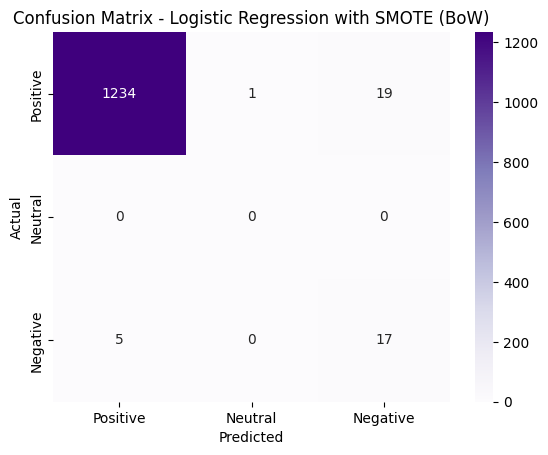

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# BoW matrix from Task 3
X_bow = bow_matrix
y = main_df['final_sentiment']

# Splitting data into training and testing sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)


# Applying SMOTE to balance the training data
smote = SMOTE(random_state=42, k_neighbors=2) # Reduced k_neighbors to 2
X_train_resampled_bow, y_train_resampled_bow = smote.fit_resample(X_train_bow, y_train)

# Training Logistic Regression on resampled data
logreg_bow_smote = LogisticRegression(max_iter=200, random_state=42)
logreg_bow_smote.fit(X_train_resampled_bow, y_train_resampled_bow)

# Prediction and evaluation
y_pred_bow_smote = logreg_bow_smote.predict(X_test_bow)
print("Logistic Regression with SMOTE (BoW) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_bow_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bow_smote))

conf_matrix_bow_smote = confusion_matrix(y_test, y_pred_bow_smote, labels=["Positive", "Neutral", "Negative"])
sns.heatmap(conf_matrix_bow_smote, annot=True, fmt='d', cmap='Purples', xticklabels=["Positive", "Neutral", "Negative"], yticklabels=["Positive", "Neutral", "Negative"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression with SMOTE (BoW)')
plt.show()


*The model achieves 98.04% accuracy, performing well for the Positive class (F1-score: 0.99) and moderately improving Negative class recall (77%) with SMOTE. However, Neutral class predictions fail entirely due to extreme imbalance. The Positive class dominates both the dataset and performance, while Negative class precision (47%) remains low.*

*Improvements:*

*   *Increase Neutral class samples using SMOTE or adjust the dataset to ensure representation.*
*   *Experiment with alternative models or feature engineering for better balance across classes.*


Logistic Regression with SMOTE (TF-IDF) Results
Accuracy: 0.9835423197492164

Classification Report:
               precision    recall  f1-score   support

    Negative       0.52      0.73      0.60        22
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.99      0.99      1254

    accuracy                           0.98      1276
   macro avg       0.50      0.57      0.53      1276
weighted avg       0.99      0.98      0.99      1276



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


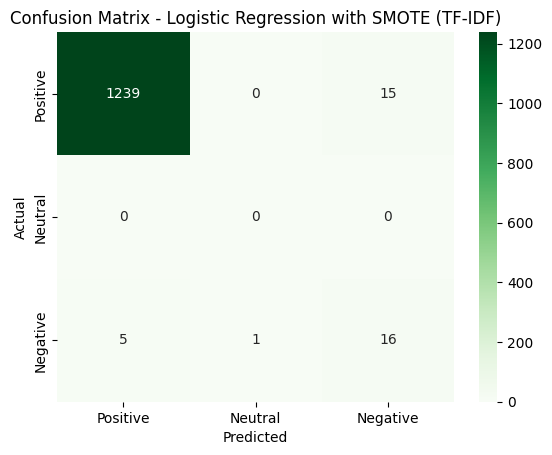

In [ ]:
# TF-IDF matrix from Task 3
X_tfidf = tfidf_matrix

# Splitting data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Applying SMOTE to balance the training data
X_train_resampled_tfidf, y_train_resampled_tfidf = smote.fit_resample(X_train_tfidf, y_train)

# Training Logistic Regression on resampled data
logreg_tfidf_smote = LogisticRegression(max_iter=200, random_state=42)
logreg_tfidf_smote.fit(X_train_resampled_tfidf, y_train_resampled_tfidf)

# Prediction and evaluation
y_pred_tfidf_smote = logreg_tfidf_smote.predict(X_test_tfidf)
print("Logistic Regression with SMOTE (TF-IDF) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf_smote))

conf_matrix_tfidf_smote = confusion_matrix(y_test, y_pred_tfidf_smote, labels=["Positive", "Neutral", "Negative"])
sns.heatmap(conf_matrix_tfidf_smote, annot=True, fmt='d', cmap='Greens', xticklabels=["Positive", "Neutral", "Negative"], yticklabels=["Positive", "Neutral", "Negative"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression with SMOTE (TF-IDF)')
plt.show()


*The Logistic Regression model with TF-IDF and SMOTE achieves 98.35% accuracy, performing exceptionally well for the Positive class (F1-score: 0.99) and moderately improving Negative class recall (73%). However, the model completely fails to classify the Neutral class due to insufficient samples. Negative class precision is low (52%), leading to some false positives. Overall, the model's performance is heavily biased toward the Positive class, highlighting a need for better handling of minority classes through improved data balance or alternative models.*

*Improvements:*


*   *Add more Neutral class samples or balance the dataset further.*
*   *Explore alternative models or feature engineering to handle minority classes better.*


Logistic Regression with SMOTE (Word2Vec) Results
Accuracy: 0.7601880877742947

Classification Report:
               precision    recall  f1-score   support

    Negative       0.05      0.77      0.10        22
     Neutral       0.00      0.00      0.00         0
    Positive       0.99      0.76      0.86      1254

    accuracy                           0.76      1276
   macro avg       0.35      0.51      0.32      1276
weighted avg       0.98      0.76      0.85      1276



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


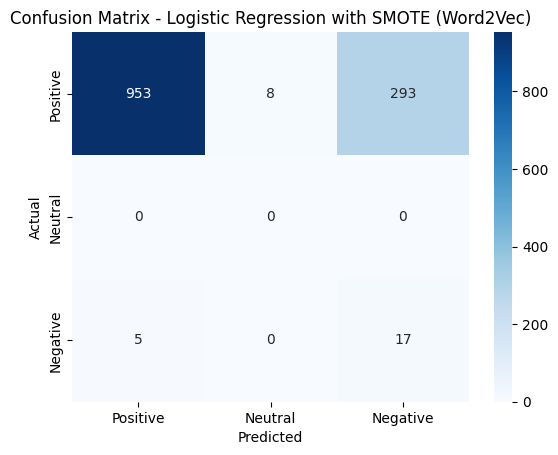

In [ ]:
# Use Word2Vec matrix from Task 3
X_w2v = word2vec_matrix
y = main_df['final_sentiment']

# Splitting data into training and testing sets
X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

# Applying SMOTE to balance the training data
smote = SMOTE(random_state=42, k_neighbors=2) # Reduced k_neighbors to 2
X_train_resampled_w2v, y_train_resampled_w2v = smote.fit_resample(X_train_w2v, y_train)

# Training Logistic Regression on resampled data
logreg_w2v_smote = LogisticRegression(max_iter=200, random_state=42)
logreg_w2v_smote.fit(X_train_resampled_w2v, y_train_resampled_w2v)

# Prediction and evaluation
y_pred_w2v_smote = logreg_w2v_smote.predict(X_test_w2v)
print("Logistic Regression with SMOTE (Word2Vec) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_w2v_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_w2v_smote))

conf_matrix_w2v_smote = confusion_matrix(y_test, y_pred_w2v_smote, labels=["Positive", "Neutral", "Negative"])
sns.heatmap(conf_matrix_w2v_smote, annot=True, fmt='d', cmap='Blues', xticklabels=["Positive", "Neutral", "Negative"], yticklabels=["Positive", "Neutral", "Negative"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression with SMOTE (Word2Vec)')
plt.show()


*The Logistic Regression model with Word2Vec embeddings and SMOTE achieves 76.02% accuracy, performing well for the Positive class (F1-score: 0.86) but struggling with the Negative class (F1-score: 0.10, precision: 5%). The Neutral class is entirely unclassified due to insufficient representation. While SMOTE improves Negative class recall (77%), the overall performance is lower compared to models using BoW or TF-IDF embeddings.*

*Improvements:*


*   *Fine-tune Word2Vec embeddings or use pre-trained embeddings like GloVe.*
*   *Add more Neutral samples to the dataset.*
*   *Experiment with more advanced models like SVM or ensemble methods.*





Logistic Regression with SMOTE Results
Accuracy: 0.9686520376175548

Classification Report:
               precision    recall  f1-score   support

    Negative       0.35      0.95      0.51        22
    Positive       1.00      0.97      0.98      1254

    accuracy                           0.97      1276
   macro avg       0.67      0.96      0.75      1276
weighted avg       0.99      0.97      0.98      1276



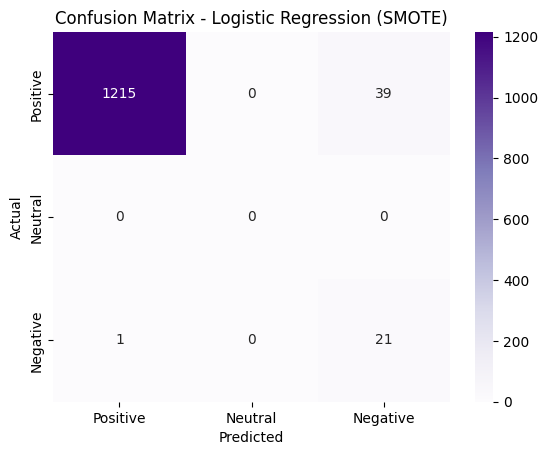

In [ ]:
# Use GloVe matrix from task 3
X = glove_matrix
y = main_df['final_sentiment']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to balance the training data
smote = SMOTE(random_state=42, k_neighbors=min(5, y_train.value_counts().min() - 1)) # Dynamically adjust k_neighbors
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Training Logistic Regression on resampled data
logreg_smote = LogisticRegression(max_iter=200, random_state=42)
logreg_smote.fit(X_train_resampled, y_train_resampled)

# Prediction and evaluation
y_pred_smote = logreg_smote.predict(X_test)
print("Logistic Regression with SMOTE Results")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

conf_matrix_smote = confusion_matrix(y_test, y_pred_smote, labels=["Positive", "Neutral", "Negative"])
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Purples', xticklabels=["Positive", "Neutral", "Negative"], yticklabels=["Positive", "Neutral", "Negative"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (SMOTE)')
plt.show()


*The model with GloVe embeddings and SMOTE achieves 96.87% accuracy, performing exceptionally well for the Positive class (F1-score: 0.98) and improving Negative class recall (95%). However, Negative precision is low (35%), causing many false positives, and the Neutral class is entirely unclassified due to insufficient representation. The model is heavily biased toward the Positive class.*

*Improvements:*


*   *Add more Neutral samples or ensure proper class representation in the data.*
*   *Consider using a multi-class classification approach or advanced models like SVM or ensemble methods to improve performance for minority classes.*



SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

labels = main_df['final_sentiment']

# Defining function to evaluate SVM with SMOTE and a confusion matrix
def evaluate_with_svm(feature_matrix, labels, feature_name):
    print(f"\nEvaluating for {feature_name} Features...")

    # Debugging matrix shapes
    try:
        print(f"Feature Matrix Shape: {feature_matrix.shape}")
        print(f"Labels Shape: {len(labels)}")
    except AttributeError as e:
        print(f"Error: {e}")
        return

    # Splitting data into training and testing sets
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            feature_matrix, labels, test_size=0.2, random_state=42
        )
        print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")
    except Exception as e:
        print(f"Error during train_test_split: {e}")
        return

    # Applying SMOTE for handling class imbalance if possible
    try:
        smote = SMOTE(random_state=42, k_neighbors=1)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        print(f"Resampled Train Shape: {X_train_resampled.shape}")
    except ValueError as e:
        print(f"Skipping SMOTE due to error: {e}")
        X_train_resampled, y_train_resampled = X_train, y_train

    # Scaling features
    scaler = StandardScaler(with_mean=False)
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # Training SVM
    svm = SVC(kernel='linear', random_state=42)
    svm.fit(X_train_scaled, y_train_resampled)

    # prediction
    y_pred = svm.predict(X_test_scaled)

    # Evaluation of performance
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {feature_name}')
    plt.show()

    print("\n" + "-" * 50)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Evaluating for Bag of Words (BoW) Features...
Feature Matrix Shape: (6378, 16563)
Labels Shape: 6378
Train Shape: (5102, 16563), Test Shape: (1276, 16563)
Resampled Train Shape: (14928, 16563)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.31      0.50      0.39        22
     Neutral       0.00      0.00      0.00         0
    Positive       0.99      0.98      0.98      1254

    accuracy                           0.97      1276
   macro avg       0.44      0.49      0.46      1276
weighted avg       0.98      0.97      0.97      1276

Accuracy: 0.969435736677116

Confusion Matrix:
[[  11    0   11]
 [   0    0    0]
 [  24    4 1226]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


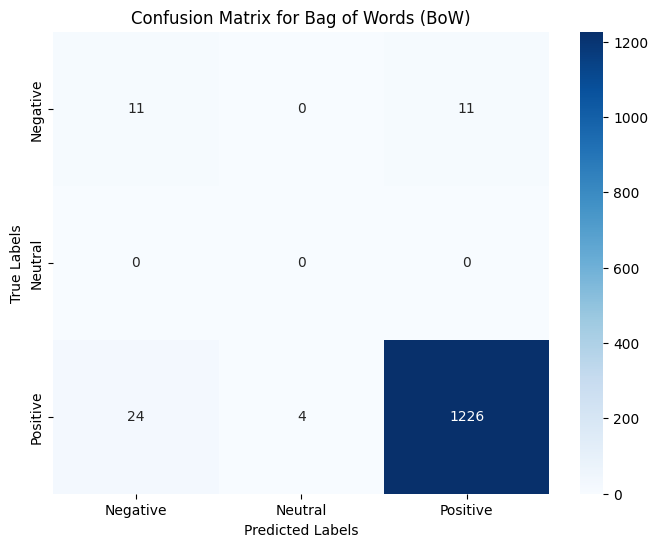


--------------------------------------------------


In [ ]:
# Bag of Words (BoW)
evaluate_with_svm(bow_matrix, labels, "Bag of Words (BoW)")

*The SVM model with BoW features and SMOTE achieves 96.94% accuracy, performing exceptionally well for the Positive class (F1-score: 0.98). Negative class recall improves to 50%, but precision remains low (31%), resulting in many false positives. The Neutral class is unclassified due to insufficient representation. The model is heavily biased toward the Positive class, highlighting the need for better Neutral class representation and further tuning for minority classes.*

*Improvements:*


*   *Add more Neutral class samples to improve performance for this class.*
*   *Explore alternative feature representations (e.g., TF-IDF or embeddings) and advanced classifiers to address the imbalance.*



Evaluating for TF-IDF Features...
Feature Matrix Shape: (6378, 16563)
Labels Shape: 6378
Train Shape: (5102, 16563), Test Shape: (1276, 16563)
Resampled Train Shape: (14928, 16563)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Classification Report:
              precision    recall  f1-score   support

    Negative       0.60      0.41      0.49        22
     Neutral       0.00      0.00      0.00         0
    Positive       0.99      0.98      0.99      1254

    accuracy                           0.97      1276
   macro avg       0.53      0.46      0.49      1276
weighted avg       0.98      0.97      0.98      1276

Accuracy: 0.9741379310344828

Confusion Matrix:
[[   9    0   13]
 [   0    0    0]
 [   6   14 1234]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


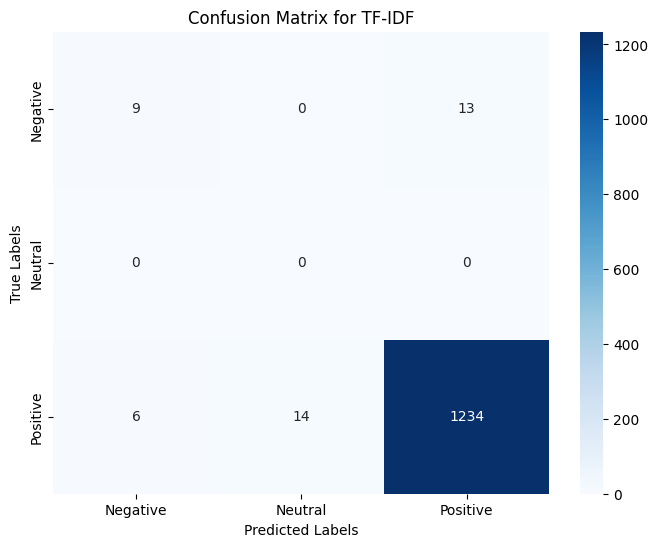


--------------------------------------------------


In [ ]:
# TF-IDF
evaluate_with_svm(tfidf_matrix, labels, "TF-IDF")

*The SVM model with TF-IDF features and SMOTE achieves 97% accuracy, performing very well for the Positive class (F1-score: 0.99). Negative class precision improves to 60%, but recall is relatively low (41%). The Neutral class is entirely unclassified due to insufficient representation. The model heavily favors the Positive class, highlighting the need for better handling of minority classes like Neutral and Negative through improved representation or alternative techniques.*

*Improvements:*


*   *Increase Neutral class representation to improve performance for this class.*
*   *Consider alternative feature representations or more advanced models for better handling of minority classes.*




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Evaluating for Word2Vec Features...
Feature Matrix Shape: (6378, 100)
Labels Shape: 6378
Train Shape: (5102, 100), Test Shape: (1276, 100)
Resampled Train Shape: (14928, 100)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.06      0.86      0.12        22
    Positive       1.00      0.77      0.87      1254

    accuracy                           0.77      1276
   macro avg       0.53      0.82      0.49      1276
weighted avg       0.98      0.77      0.86      1276

Accuracy: 0.7711598746081505

Confusion Matrix:
[[ 19   3]
 [289 965]]


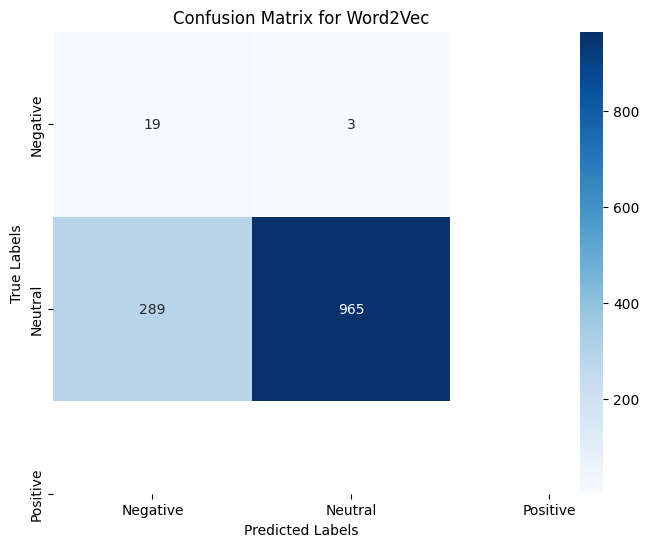


--------------------------------------------------


In [ ]:
# Word2Vec
evaluate_with_svm(word2vec_matrix, labels, "Word2Vec")

*The SVM model with Word2Vec embeddings and SMOTE achieves 77.12% accuracy, performing well in terms of Negative class recall (86%) and Positive class precision (1.00). However, the Negative class precision is very low (6%), leading to many false positives. The Neutral class is entirely unclassified due to insufficient representation. Overall, the model is less effective compared to BoW or TF-IDF approaches, suggesting a need for better feature representation and class balance improvements.*

*Improvements:*


*   *Improve class balance by increasing Neutral and Negative samples.*
*   *Consider using pre-trained embeddings (e.g., GloVe) for better feature representation.*
*   *Experiment with other models or hyperparameter tuning for improved performance.*







Evaluating for GloVe Features...
Feature Matrix Shape: (6378, 100)
Labels Shape: 6378
Train Shape: (5102, 100), Test Shape: (1276, 100)
Resampled Train Shape: (14928, 100)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Classification Report:
              precision    recall  f1-score   support

    Negative       0.39      0.91      0.55        22
    Positive       1.00      0.98      0.99      1254

    accuracy                           0.97      1276
   macro avg       0.70      0.94      0.77      1276
weighted avg       0.99      0.97      0.98      1276

Accuracy: 0.9741379310344828

Confusion Matrix:
[[  20    2]
 [  31 1223]]


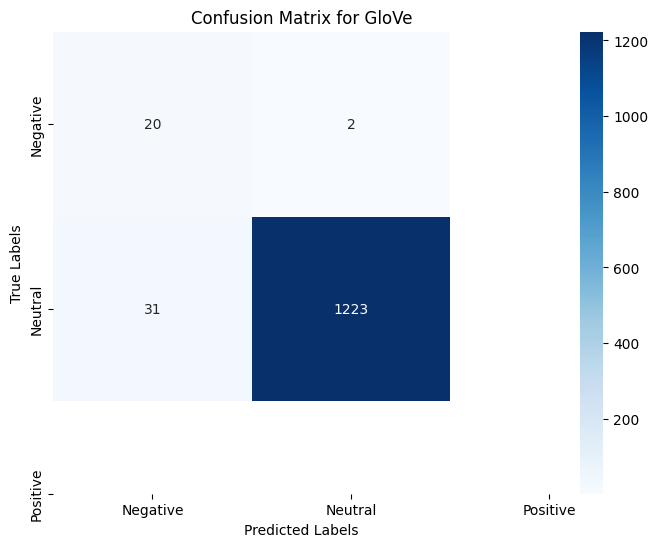


--------------------------------------------------


In [ ]:
# GloVe
evaluate_with_svm(glove_matrix, labels, "GloVe")

*The SVM model with Word2Vec embeddings and SMOTE achieves 77.12% accuracy, with strong recall for the Negative class (86%) but extremely low precision (6%), leading to many false positives. The Positive class performs well, with perfect precision (1.00) and moderate recall (77%). The Neutral class is unclassified due to insufficient representation. Overall, the model struggles to balance minority classes, highlighting the need for better feature representation and improved dataset balance.*

*Improvements:*


*   *Improve Negative and Neutral class representation in the dataset.*
*   *Explore pre-trained embeddings like GloVe for better feature representation.*
*   *Experiment with advanced classifiers or hyperparameter tuning for better handling of minority classes.*





Random Forest

Bag of Words + SMOTE + Random Forest Accuracy: 0.9733542319749217
              precision    recall  f1-score   support

    Negative       0.56      0.25      0.35        36
     Neutral       0.00      0.00      0.00         1
    Positive       0.98      1.00      0.99      1239

    accuracy                           0.97      1276
   macro avg       0.51      0.42      0.44      1276
weighted avg       0.97      0.97      0.97      1276



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


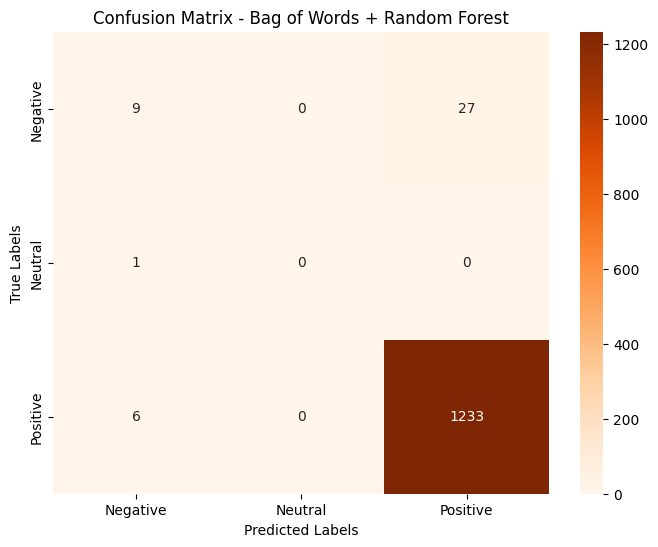

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(main_df['cleaned_text'], main_df['sentiment'], test_size=0.2, random_state=42)

# Bag of Words
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Applying SMOTE to balance the classes
# Reducing k_neighbors to a smaller value to ensure it's less than the number of samples in any minority class.
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_bow_balanced, y_train_balanced = smote.fit_resample(X_train_bow, y_train)

# Training Random Forest on balanced data
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_bow_balanced, y_train_balanced)
y_pred_smote = rf_smote.predict(X_test_bow)

conf_matrix = confusion_matrix(y_test, y_pred_smote, labels=rf_smote.classes_)

# Evaluation
print("Bag of Words + SMOTE + Random Forest Accuracy:", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=rf_smote.classes_, yticklabels=rf_smote.classes_)
plt.title('Confusion Matrix - Bag of Words + Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


*The Random Forest model with BoW features and SMOTE achieves 97.33% accuracy, performing exceptionally well for the Positive class (F1-score: 0.99). However, the Negative class has low recall (25%), leading to many misclassifications as Positive, and the Neutral class is entirely unclassified due to insufficient representation. The model heavily favors the Positive class, highlighting the need for better representation of minority classes to improve balance and performance.*

*Improvements:*


*   *Increase representation of Neutral and Negative classes in the dataset.*
*   *Consider more advanced feature engineering or alternative models like boosting algorithms (e.g., XGBoost).*



TF-IDF + Random Forest Accuracy: 0.9717868338557993
              precision    recall  f1-score   support

    Negative       1.00      0.03      0.05        36
     Neutral       0.00      0.00      0.00         1
    Positive       0.97      1.00      0.99      1239

    accuracy                           0.97      1276
   macro avg       0.66      0.34      0.35      1276
weighted avg       0.97      0.97      0.96      1276



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


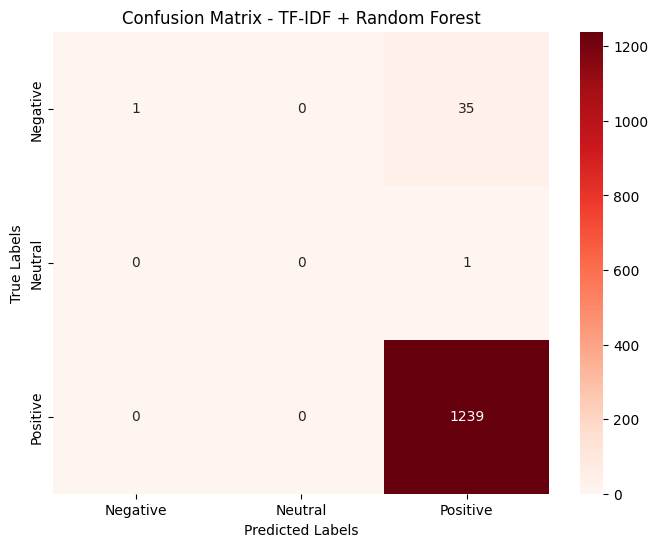

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Training Random Forest with TF-IDF
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)

# Evaluation
print("TF-IDF + Random Forest Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))

conf_matrix = confusion_matrix(y_test, y_pred_tfidf, labels=rf_tfidf.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=rf_tfidf.classes_, yticklabels=rf_tfidf.classes_)
plt.title('Confusion Matrix - TF-IDF + Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

classification_metrics = classification_report(y_test, y_pred_tfidf, output_dict=True)
metrics_df = pd.DataFrame(classification_metrics).transpose()

*The Random Forest model with TF-IDF features achieves 97.18% accuracy, performing exceptionally well for the Positive class (F1-score: 0.99) due to high precision (0.97) and perfect recall (1.00). However, it struggles with minority classes: Negative class recall is extremely low (3%), and the Neutral class is completely unclassified. The model is heavily biased toward the Positive class*

*Improvements:*


*   *Improve dataset balance by increasing Negative and Neutral class samples.*
*   *Use SMOTE or other resampling techniques to handle class imbalance.*
*   *Experiment with other models (e.g., boosting algorithms) or hyperparameter tuning for better performance on minority classes.*






Word2Vec + Random Forest Accuracy: 0.9725705329153606
              precision    recall  f1-score   support

    Negative       1.00      0.06      0.11        36
     Neutral       0.00      0.00      0.00         1
    Positive       0.97      1.00      0.99      1239

    accuracy                           0.97      1276
   macro avg       0.66      0.35      0.36      1276
weighted avg       0.97      0.97      0.96      1276



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


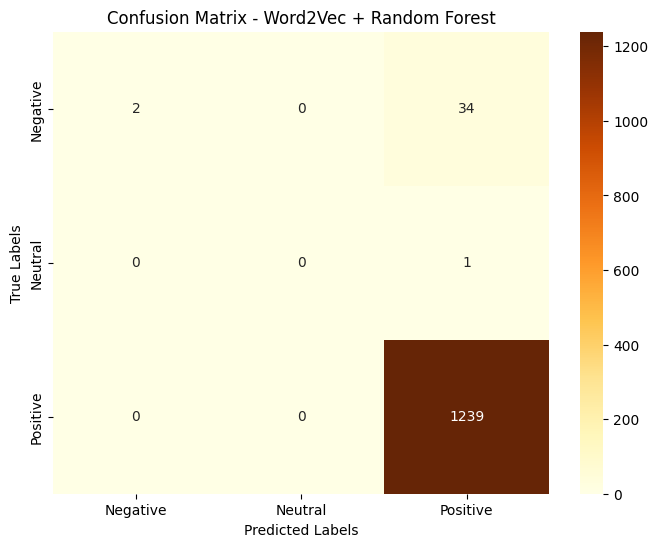

In [ ]:
# Defining function to get averaged Word2Vec embeddings for a review
def get_word2vec_embedding(review, model, vector_size=100):
    vectors = [model.wv[word] for word in review if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Generating Word2Vec embeddings
X_train_w2v = np.array([get_word2vec_embedding(review, word2vec_model) for review in X_train])
X_test_w2v = np.array([get_word2vec_embedding(review, word2vec_model) for review in X_test])

# Scaling embeddings
scaler = StandardScaler()
X_train_w2v = scaler.fit_transform(X_train_w2v)
X_test_w2v = scaler.transform(X_test_w2v)

# Training Random Forest with Word2Vec
rf_w2v = RandomForestClassifier(n_estimators=100, random_state=42)
rf_w2v.fit(X_train_w2v, y_train)
y_pred_w2v = rf_w2v.predict(X_test_w2v)

# Evaluation
print("Word2Vec + Random Forest Accuracy:", accuracy_score(y_test, y_pred_w2v))
print(classification_report(y_test, y_pred_w2v))

conf_matrix = confusion_matrix(y_test, y_pred_w2v, labels=rf_w2v.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr', xticklabels=rf_w2v.classes_, yticklabels=rf_w2v.classes_)
plt.title('Confusion Matrix - Word2Vec + Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


*The Random Forest model with Word2Vec embeddings achieves 97.26% accuracy, performing exceptionally well for the Positive class (F1-score: 0.99). However, it struggles significantly with minority classes: Negative class recall is very low (6%), and the Neutral class is completely unclassified. The model is heavily biased toward the Positive class*

*Improvements:*



*   *Increase representation of Negative and Neutral classes in the dataset to improve model performance.*
*   *Consider using oversampling techniques like SMOTE or trying more advanced embeddings (e.g., pre-trained GloVe or BERT) for better feature representation.*
*   *Experiment with boosting algorithms (e.g., XGBoost) or ensemble methods for more balanced performance.*






GloVe + Random Forest Accuracy: 0.9717868338557993
              precision    recall  f1-score   support

    Negative       1.00      0.03      0.05        36
     Neutral       0.00      0.00      0.00         1
    Positive       0.97      1.00      0.99      1239

    accuracy                           0.97      1276
   macro avg       0.66      0.34      0.35      1276
weighted avg       0.97      0.97      0.96      1276



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


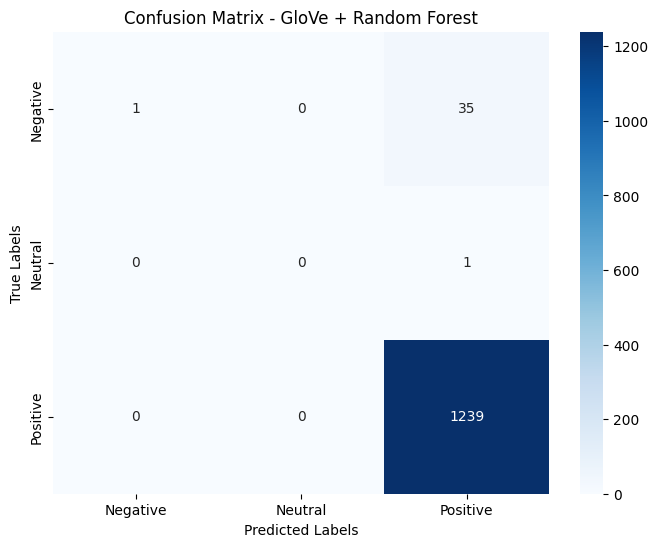

In [ ]:
# Defining function to get averaged GloVe embeddings for a review
def get_glove_embedding(review, embeddings_index, embedding_dim=100):
    vectors = [embeddings_index[word] for word in review if word in embeddings_index]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(embedding_dim)

# Generating GloVe embeddings
X_train_glove = np.array([get_glove_embedding(review, embeddings_index) for review in X_train])
X_test_glove = np.array([get_glove_embedding(review, embeddings_index) for review in X_test])

# Scaling embeddings
scaler = StandardScaler()
X_train_glove = scaler.fit_transform(X_train_glove)
X_test_glove = scaler.transform(X_test_glove)

# Training Random Forest with GloVe
rf_glove = RandomForestClassifier(n_estimators=100, random_state=42)
rf_glove.fit(X_train_glove, y_train)
y_pred_glove = rf_glove.predict(X_test_glove)

# Evaluation
print("GloVe + Random Forest Accuracy:", accuracy_score(y_test, y_pred_glove))
print(classification_report(y_test, y_pred_glove))

conf_matrix = confusion_matrix(y_test, y_pred_glove, labels=rf_glove.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_glove.classes_, yticklabels=rf_glove.classes_)
plt.title('Confusion Matrix - GloVe + Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


*The Random Forest model with GloVe embeddings achieves 97.18% accuracy, excelling in classifying the Positive class (F1-score: 0.99) with high precision (0.97) and perfect recall (1.00). However, the model struggles with minority classes: Negative class recall is very low (3%), and the Neutral class is completely unclassified. The overall performance is heavily biased toward the Positive class, indicating a need for better dataset balance or advanced techniques like SMOTE or contextual embeddings to improve recall for minority classes.*

*Improvements:*


*   *Balance the dataset by increasing representation of Negative and Neutral classes.*
*   *Consider oversampling techniques like SMOTE or advanced embeddings (e.g., contextual embeddings from BERT).*
*   *Experiment with alternative algorithms or ensemble methods to address the bias toward the Positive class.*





*Task 4 Justification:*

*Support Vector Machine (SVM):*

* *Effective for high-dimensional data like text features (BoW and TF-IDF).
Finds an optimal hyperplane for classification tasks, making it robust to noise.*

* *Strengths:
Works well with sparse, high-dimensional data.
Effective for both linear and non-linear classification tasks.*


*Logistic Regression:*

* *A simple and interpretable algorithm for binary classification tasks like sentiment analysis.
Performs well when relationships between features and target variable are linear or near-linear.*

* *Strengths:
Computationally efficient and interpretable.
Works well with TF-IDF and other frequency-based feature extraction methods.*


*Random Forest:*

* *An ensemble learning method combining multiple decision trees to improve accuracy and robustness.
Suitable for capturing non-linear relationships and interactions between features, especially when using dense embeddings like Word2Vec and GloVe.*

* *Strengths:
Resistant to overfitting and robust to noise.
Effective for structured and unstructured data.*


*Final Summary:*

*BoW and TF-IDF favor SVM and Logistic Regression, which handle sparse features well.
Word2Vec and GloVe favor Random Forest, which excels in leveraging dense, semantic embeddings.
The combination of feature extraction methods and algorithms provides a balanced evaluation of traditional and advanced text representations. This ensures the most effective approach is identified for sentiment prediction.*

# Answer to Task 5

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Loading pre-trained BERT model and tokenizer
bert_model = BertModel.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Defining function to generate embeddings using batch processing
def generate_bert_embeddings_batch(texts, model, tokenizer, max_length=64, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", padding="max_length", truncation=True, max_length=max_length)
        with torch.no_grad():
            outputs = model(**inputs)
        # Using [CLS] token's embedding for all samples in the batch
        batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()
        embeddings.extend(batch_embeddings)
    return np.array(embeddings)

# Generating embeddings in batches
X_bert = generate_bert_embeddings_batch(main_df['cleaned_text'].tolist(), bert_model, tokenizer)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

*The code generates BERT embeddings for the cleaned_text column using the pre-trained bert-base-uncased model. Each text is tokenized and processed in batches for efficiency, and the embedding of the [CLS] token is extracted to represent the entire sentence. The output is a NumPy array X_bert of shape (n_samples, 768), where each row is a contextualized 768-dimensional embedding of a text sample. These embeddings are ready to be used as features for downstream machine learning tasks like classification or clustering, offering rich semantic context compared to traditional word embeddings.*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Results with BERT Embeddings")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Results with BERT Embeddings")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results with BERT Embeddings")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Results with BERT Embeddings
Accuracy: 0.9843

Classification Report:
               precision    recall  f1-score   support

    Negative       0.55      0.55      0.55        22
    Positive       0.99      0.99      0.99      1254

    accuracy                           0.98      1276
   macro avg       0.77      0.77      0.77      1276
weighted avg       0.98      0.98      0.98      1276

SVM Results with BERT Embeddings
Accuracy: 0.9828

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        22
    Positive       0.98      1.00      0.99      1254

    accuracy                           0.98      1276
   macro avg       0.49      0.50      0.50      1276
weighted avg       0.97      0.98      0.97      1276



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Results with BERT Embeddings
Accuracy: 0.9843

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.09      0.17        22
    Positive       0.98      1.00      0.99      1254

    accuracy                           0.98      1276
   macro avg       0.99      0.55      0.58      1276
weighted avg       0.98      0.98      0.98      1276



**Summary of the Results:**
*Three models were tested using BERT embeddings for sentiment classification: Logistic Regression, SVM, and Random Forest.*

*Model Performances:*

1.  *Logistic Regression:*
*   *Accuracy: 98.43%*
*   *Handles both Positive and Negative classes well.*
*   *Balanced precision (0.55) and recall (0.55) for the Negative class.*
*   *Positive class performance is excellent (precision: 0.99, recall: 0.99).*
*   *Best overall balance in performance across all metrics.*

2.   *SVM*
*   *Accuracy: 98.28%*
*   *Fails entirely for the Negative class (precision and recall: 0.00).*
*   *Excels in the Positive class (precision: 0.98, recall: 1.00).*
*   *Poor macro average metrics due to neglecting the Negative class.*

3.  *Random Forest*
*   *Accuracy: 98.43%*
*   *Perfect precision (1.00) for the Negative class but very poor recall (0.09), indicating it predicts Negative cases poorly.*
*   *Outstanding Positive class performance (precision: 0.98, recall: 1.00).*
*   *Strong overall performance but lacks balance for the Negative class.*


*Key Observations:*
*   *Logistic Regression provides the most balanced performance between Positive and Negative classes.*
*   *SVM heavily overfits to the Positive class, completely ignoring the Negative class.*
*   *Random Forest excels in precision but struggles with recall for the Negative class, indicating poor sensitivity to minority cases.*







In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Creating a LabelEncoder object
label_encoder = LabelEncoder()

# Fitting the encoder on the training labels and transforming both training and test labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Building a simple feedforward neural network
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(len(np.unique(y_train_encoded)), activation="softmax")  # Output layer
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training the model using encoded labels
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluating the model using encoded labels
y_pred_dl = np.argmax(model.predict(X_test), axis=1)
print("Deep Learning Results with BERT Embeddings")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_dl):.4f}")
print(classification_report(y_test_encoded, y_pred_dl))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9374 - loss: 0.2179 - val_accuracy: 0.9828 - val_loss: 0.0479
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9756 - loss: 0.0738 - val_accuracy: 0.9843 - val_loss: 0.0405
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9760 - loss: 0.0677 - val_accuracy: 0.9859 - val_loss: 0.0370
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9804 - loss: 0.0527 - val_accuracy: 0.9812 - val_loss: 0.0367
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9815 - loss: 0.0520 - val_accuracy: 0.9851 - val_loss: 0.0350
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9811 - loss: 0.0542 - val_accuracy: 0.9859 - val_loss: 0.0362
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9810 - loss: 0.0562 - val_accuracy: 0.9851 - val_loss: 0.0346
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9825 - loss: 0.0441 - val_acc

*The code implements a deep learning model for sentiment classification using BERT embeddings. It first encodes the sentiment labels into numerical format to make them compatible with the neural network. The model consists of an input layer for BERT embeddings, two hidden layers with ReLU activation, and dropout layers to prevent overfitting. The output layer uses softmax activation to classify sentiments.*

*The model is compiled using the Adam optimizer and sparse categorical crossentropy as the loss function. It is trained for 10 epochs with a batch size of 32, showing steadily decreasing loss and validation accuracy stabilizing at 98.59%. The model achieves an overall accuracy of 98.59% on the test set, performing exceptionally well on the majority class (positive sentiment) but showing moderate performance on the minority class (negative sentiment) due to class imbalance.*

*The results demonstrate the effectiveness of BERT embeddings in capturing semantic relationships, enabling high accuracy while highlighting areas for improvement in handling imbalanced data.*

*The neural network trained on BERT embeddings achieved excellent performance, with an accuracy of 98.59%. The model performs exceptionally well for the Positive class (high precision, recall, and F1-score). However, the Negative class performance is moderate, with lower recall and F1-score due to the small number of Negative samples in the dataset. The decreasing validation loss and high validation accuracy confirm that the model generalized well to unseen data.*

In [ ]:
# Creating a dictionary to store results for performance comparison
performance_results = {
    "Model": ["Logistic Regression", "SVM", "Random Forest", "Deep Learning (NN)"],
    "Accuracy": [0.9843, 0.9828, 0.9843, 0.9859],
    "F1-Score (Positive)": [0.99 , 0.99, 0.99,  0.99],
    "F1-Score (Negative)": [0.55, 0.00, 0.17, 0.50],
    "Macro Avg F1-Score": [0.77, 0.50, 0.58, 0.75],
}

# Converting the dictionary to a pandas DataFrame
performance_df = pd.DataFrame(performance_results)

# Displaying the performance comparison table
print("Performance Comparison Table:")
performance_df.head()


Performance Comparison Table:


,Model,Accuracy,F1-Score (Positive),F1-Score (Negative),Macro Avg F1-Score
0,Logistic Regression,0.9843,0.99,0.55,0.77
1,SVM,0.9828,0.99,0.00,0.50
2,Random Forest,0.9843,0.99,0.17,0.58
3,Deep Learning (NN),0.9859,0.99,0.50,0.75


*In summary, while all models excelled in predicting positive sentiments, Logistic Regression and Deep Learning outperformed others in handling class imbalance, with Deep Learning achieving the most balanced performance. SVM struggled with the negative class, indicating potential limitations in dealing with imbalanced datasets.*

# Answer to Task 6

In [ ]:
import pandas as pd
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import random

In [ ]:
print(main_df['tokenized_text'].head())

0    review state beautiful hotel commanding sweepi...
1    hotel view fort pool walk breakfast buffet off...
2    view sunset staff attentive friendly stay staf...
3    hotel galle fort pool walk breakfast sri lanka...
4    beautiful view pool staff friendly room amazin...
Name: tokenized_text, dtype: object


*Each row shows a tokenized version of a review as a string.*

In [ ]:
# Converting space-separated strings to lists of words
tokenised_reviews = main_df['tokenized_text'].apply(lambda x: x.split()).tolist()

*The reviews from tokenized_text are transformed into lists of words for easier manipulation and processing in subsequent steps.*

In [ ]:
# Creating a dictionary and a corpus for LDA
dictionary = Dictionary(tokenised_reviews)
corpus = [dictionary.doc2bow(review) for review in tokenised_reviews]

*A dictionary mapping unique words to IDs and a bag-of-words corpus representation are generated, preparing the data for topic modeling with LDA.*

In [ ]:
# Defining function to compute coherence scores for different numbers of topics
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    """
    Compute coherence scores for various numbers of topics.

    Parameters:
    - dictionary: Gensim dictionary
    - corpus: Gensim corpus
    - texts: List of tokenized texts
    - start: Minimum number of topics
    - limit: Maximum number of topics
    - step: Step size

    Returns:
    - model_list: List of LDA models
    - coherence_values: List of coherence scores
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

*The code defines a function compute_coherence_values to evaluate the quality of topic models created using Latent Dirichlet Allocation (LDA). It generates multiple LDA models for a specified range of topic numbers and computes their coherence scores, which measure the interpretability of the topics.*

*The function takes a dictionary, corpus, tokenized texts, and a range of topic numbers as input. It iterates through the range, creates an LDA model for each number of topics, computes its coherence score using Gensim's CoherenceModel, and stores the results. Finally, it returns a list of the LDA models and their corresponding coherence scores, helping identify the optimal number of topics based on the highest coherence score.*

In [ ]:
# Finding optimal number of topics
start = 2
limit = 15
step = 1

model_list, coherence_values = compute_coherence_values(dictionary, corpus, tokenised_reviews, start, limit, step)

*The code generates LDA models with topics ranging from 2 to 15 and calculates coherence scores for each model. The goal is to identify the number of topics with the highest coherence score, indicating the most meaningful and interpretable topic model.*

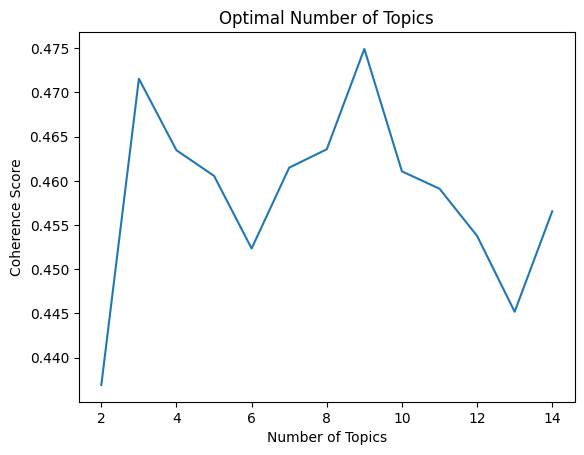

In [ ]:
# Plotting coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

*The graph displays coherence scores for various numbers of topics in a topic modeling exercise, ranging from 2 to 14. Coherence measures the semantic similarity of words within a topic, with higher scores indicating better interpretability and topic quality. The plot reveals that the optimal number of topics is 9, as the coherence score peaks at this point. This suggests that the best model for representing the data and extracting meaningful insights consists of 9 distinct topics.*

In [ ]:
# Selection of the optimal number of topics
optimal_num_topics = x[coherence_values.index(max(coherence_values))]
print(f"Optimal number of topics: {optimal_num_topics}")

Optimal number of topics: 9


*The code identifies the optimal number of topics by selecting the value of x (number of topics) corresponding to the maximum coherence score from the list coherence_values. The coherence score, which measures the semantic similarity of words within a topic, determines the quality of the topics. The max(coherence_values) function finds the highest coherence score, and index() retrieves its index. The optimal number of topics is then extracted using this index.*

In [ ]:
# Training the LDA model with the optimal number of topics achieved
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics, random_state=42, passes=10)

*The code trains an LDA (Latent Dirichlet Allocation) model with the optimal number of topics determined earlier (e.g., 9). Using the text corpus and dictionary, the model identifies patterns to assign topics to documents and words based on probabilities. This trained model can now be utilized to extract and interpret the main themes or topics present in the dataset.*

In [ ]:
# Display the topics
topics = lda_model.print_topics(num_words=5)
print("\nTopics identified by LDA:")
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")


Topics identified by LDA:
Topic 0: 0.013*"safari" + 0.011*"one" + 0.011*"food" + 0.008*"two" + 0.008*"day"
Topic 1: 0.016*"best" + 0.015*"staff" + 0.013*"service" + 0.013*"team" + 0.012*"hotel"
Topic 2: 0.033*"good" + 0.033*"food" + 0.029*"staff" + 0.028*"hotel" + 0.026*"nice"
Topic 3: 0.039*"staff" + 0.034*"room" + 0.032*"hotel" + 0.025*"friendly" + 0.025*"great"
Topic 4: 0.015*"hotel" + 0.011*"food" + 0.009*"drink" + 0.008*"one" + 0.008*"dinner"
Topic 5: 0.019*"beach" + 0.019*"room" + 0.017*"pool" + 0.016*"hotel" + 0.011*"sri"
Topic 6: 0.021*"stay" + 0.018*"made" + 0.015*"staff" + 0.014*"experience" + 0.013*"special"
Topic 7: 0.026*"room" + 0.024*"hotel" + 0.009*"staff" + 0.007*"would" + 0.007*"service"
Topic 8: 0.012*"experience" + 0.012*"local" + 0.012*"stay" + 0.010*"offer" + 0.010*"room"


*The output displays the topics identified by the LDA model, with each topic represented as a combination of key words and their associated probabilities. These probabilities indicate the importance of each word in describing the topic.*

*For example:*


*   *Topic 0 is associated with words like "safari," "one," "food," "two," and "day."*
*   *Topic 4 includes words such as "hotel," "food," "drink," "one," and "dinner."*


*This breakdown highlights the dominant themes or topics in the dataset, each characterized by the most relevant words. These topics can now be used for interpretation, categorization, or further analysis of the text data.*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


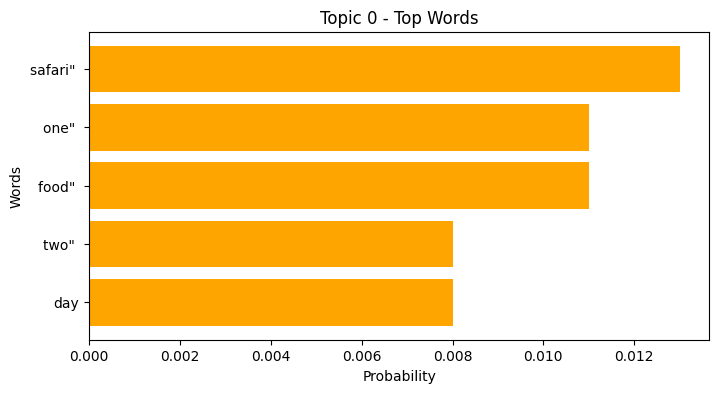

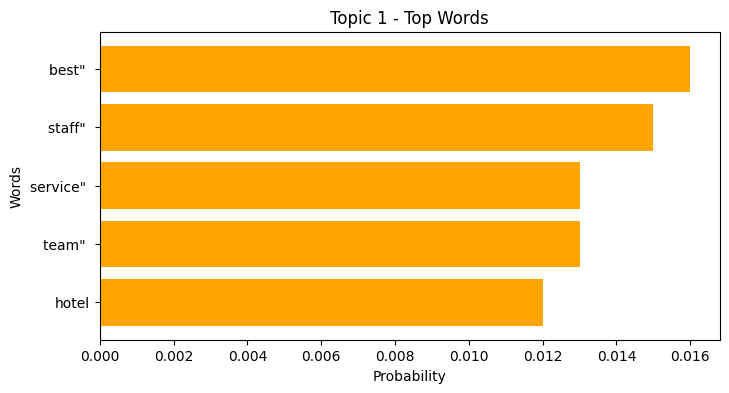

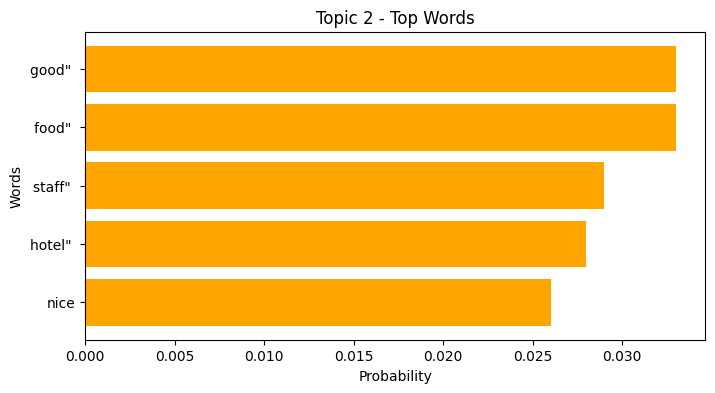

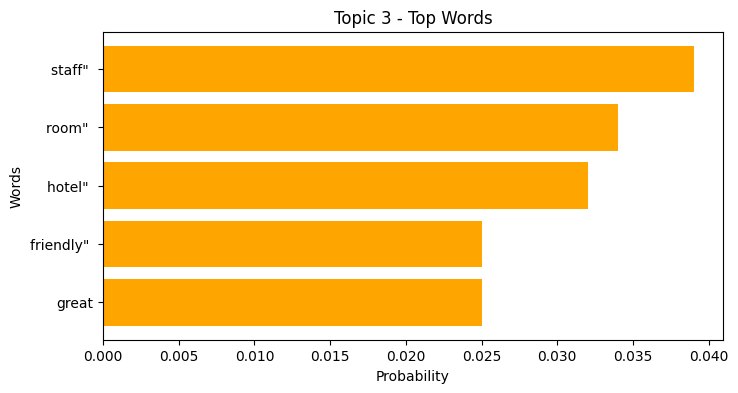

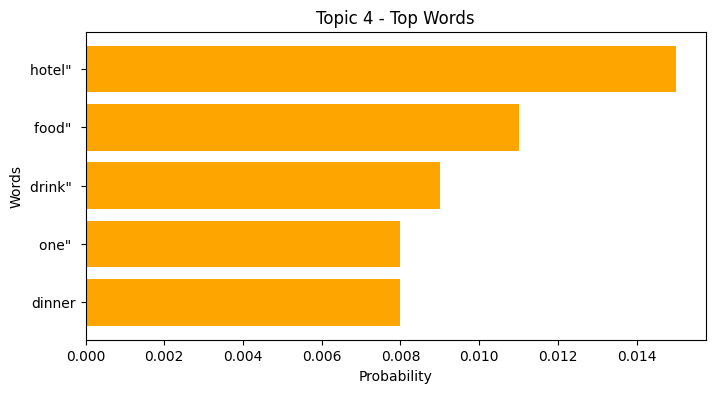

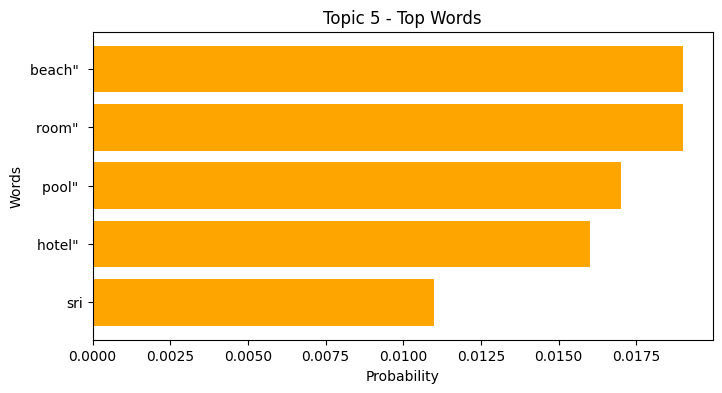

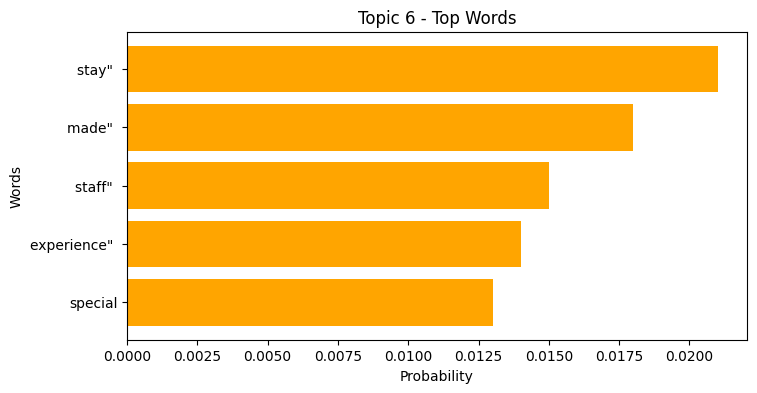

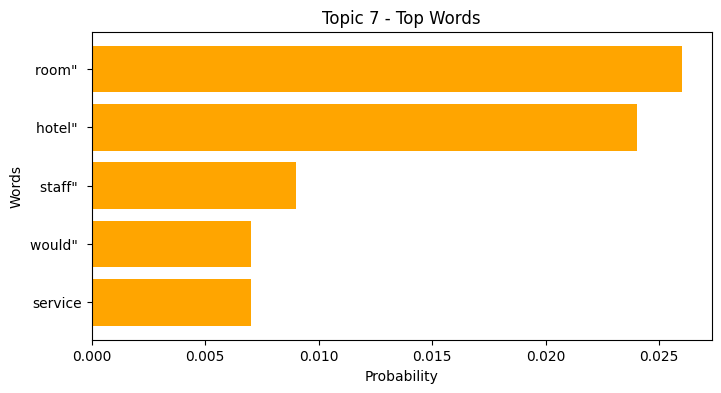

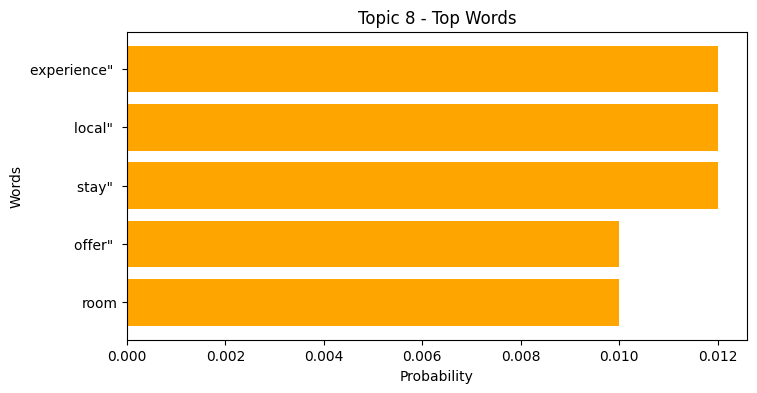

In [ ]:
import matplotlib.pyplot as plt

# Preparing the data for plotting
num_words = 5  # Number of words per topic
topics = lda_model.print_topics(num_words=num_words)
topic_data = []

for idx, topic in topics:
    words_probs = [tuple(word.split("*")) for word in topic.split("+")]
    topic_data.append({"Topic": idx, "Words": [w[1].strip('"') for w in words_probs], "Probabilities": [float(w[0]) for w in words_probs]})

# Plot for each topic
for topic in topic_data:
    plt.figure(figsize=(8, 4))
    plt.barh(topic["Words"], topic["Probabilities"], color='orange')
    plt.xlabel('Probability')
    plt.ylabel('Words')
    plt.title(f'Topic {topic["Topic"]} - Top Words')
    plt.gca().invert_yaxis()
    plt.show()


*The provided bar charts display the top words contributing to each topic extracted by the LDA (Latent Dirichlet Allocation) model. Each chart corresponds to one of the topics, and the bars represent the probabilities (or weights) of the words being associated with that topic.*

*Key Observations:*
1. *Topic 0: Words like "safari," "one," "food," "two," and "day" dominate, suggesting the topic might relate to outdoor or adventure-related activities.*
2. *Topic 1: The prominent words are "best," "staff," "service," "team," and "hotel," indicating a focus on customer service and staff quality in hotels.*
3. *Topic 2: Words like "good," "food," "staff," "hotel," and "nice" are prevalent, possibly describing general positive experiences at hotels.*
4. *Topic 3: The dominant words are "staff," "room," "hotel," "friendly," and "great," suggesting the topic relates to accommodation quality and hospitality.*
5. *Topic 4: Words such as "hotel," "food," "drink," "one," and "dinner" suggest the topic focuses on dining experiences at hotels.*
6. *Topic 5: Key terms like "beach," "room," "pool," "hotel," and "sri" highlight topics related to beach vacations and facilities.*
7. *Topic 6: Words like "stay," "made," "staff," "experience," and "special" indicate personalized and memorable experiences.*
8. *Topic 7: Terms such as "room," "hotel," "staff," "would," and "service" emphasize accommodation and service quality.*
9. *Topic 8: Words like "experience," "local," "stay," "offer," and "room" suggest topics involving cultural and local experiences at hotels.*


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


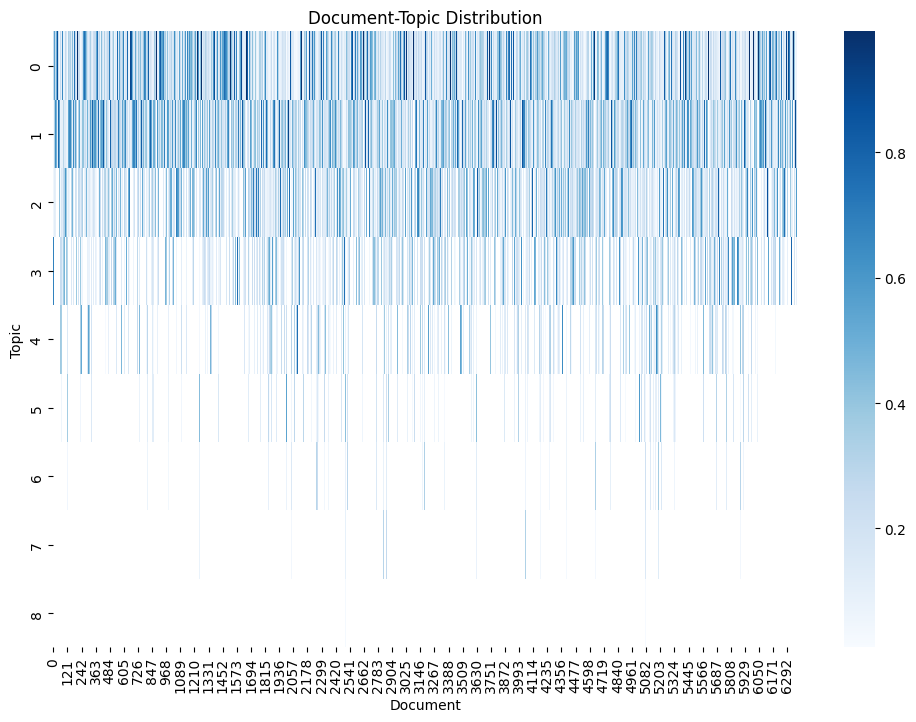

In [ ]:
import pandas as pd
import seaborn as sns

# Getting the topic distribution for each document/review
doc_topics = [lda_model.get_document_topics(doc) for doc in corpus]
doc_topic_df = pd.DataFrame([
    [topic_prob[1] for topic_prob in doc]
    for doc in doc_topics
])

# Plot a heatmap of document-topic distribution
plt.figure(figsize=(12, 8))
sns.heatmap(doc_topic_df.T, cmap="Blues", cbar=True)
plt.title("Document-Topic Distribution")
plt.xlabel("Document")
plt.ylabel("Topic")
plt.show()


*This heatmap provides a visual summary of how documents are distributed across topics. It highlights the dominant topic for each document and the overall sparsity in the document-topic association.*

*The intensity of the color indicates the probability of a document belonging to a particular topic:*
*   *Dark blue indicates a high probability of the document belonging to the corresponding topic.*
*   *Light blue or white indicates a low probability.*



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


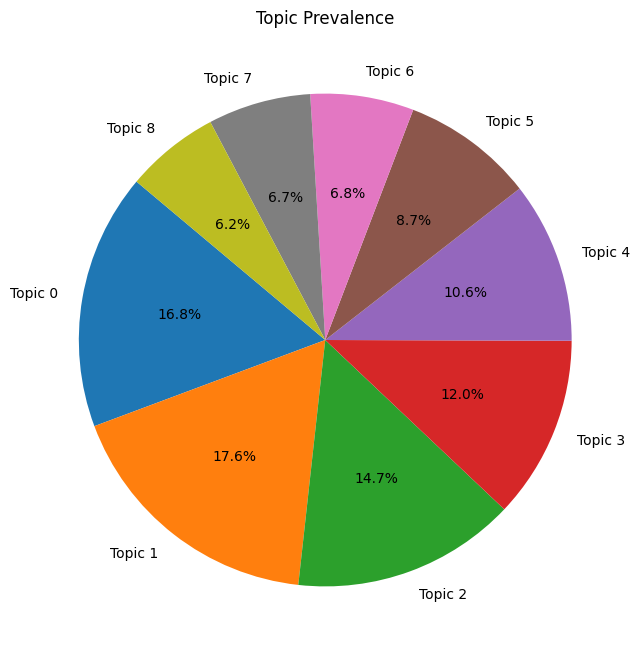

In [ ]:
topic_prevalence = doc_topic_df.mean(axis=0)
plt.figure(figsize=(8, 8))
plt.pie(topic_prevalence, labels=[f"Topic {i}" for i in range(len(topic_prevalence))], autopct='%1.1f%%', startangle=140)
plt.title("Topic Prevalence")
plt.show()


*The pie chart provides an overview of how reviews are distributed among the 9 topics extracted from the dataset. Topic 1 and Topic 0 dominate the dataset, indicating their high relevance or commonality across the reviews. On the other hand, Topics 7, 6, and 8 are less prevalent, contributing relatively smaller proportions of the total review dataset. This distribution helps understand the primary themes and their relative importance in the dataset before narrowing down to specific samples for further analysis.*

In [ ]:
# Coherence score for evaluation
coherence_model = CoherenceModel(model=lda_model, texts=tokenised_reviews, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"\nFinal Coherence Score for {optimal_num_topics} topics: {coherence_score}")


Final Coherence Score for 9 topics: 0.474929892868724


*The code calculates the coherence score for the LDA model with 9 topics, resulting in a score of 0.4749. This score measures the interpretability and quality of the generated topics, indicating moderate semantic consistency.*

Step 2: Manually Label the Topics

Read each of the 50 reviews carefully.

In [ ]:
import random

# Randomly sample 50 reviews
sampled_reviews = main_df.sample(n=50, random_state=42)

*The code randomly selects 50 reviews from the main dataset (main_df) using the sample method, ensuring reproducibility by setting a random seed (random_state=42). The selected reviews are displayed, showing the cleaned_text column.*

In [ ]:
print(sampled_reviews['cleaned_text'])

2718    aww like yummy food first time experice food w...
4275    wild coast tented lodge probably one memorable...
4141    everything perfect staff great accommodation b...
1199    krishma imasha dimasha looked well friendly se...
4546    th birthday celebration friend group people lo...
233     thanks much shakila taking good care u going b...
1618    staff treated u wonderfully fulfilled order ki...
296     place amazing nice location architecture pure ...
5407    buffet terrible wasnt enough food buffet lunch...
5255    welcome hospitality wonderful staff friendly e...
1840    although quiet season rain prevalent spice tra...
2840    rotary club moratuwa president installation rd...
538     summarize heritage hotel offer accommodation p...
4969    wife spent two amazing night cousin nishanthi ...
96      stayed secret escape trip arrived school finis...
3905    hotel advertised bookingcom say star near dirt...
1235    stayed cinnamon grand sri lankan homecoming am...
2899    homeco

In [ ]:
# Using this csv file to manually add topics to the random 50 reviews
# Adding a new column for row numbers (index)
sampled_reviews_with_index = sampled_reviews.reset_index()

# Renaming the index column for clarity
sampled_reviews_with_index.rename(columns={'index': 'Row Number'}, inplace=True)

# Save to a CSV file
sampled_reviews_with_index[['Row Number', 'cleaned_text']].to_csv('sampled_cleaned_reviews_with_row_numbers.csv', index=False)

print("Saved sampled cleaned text with row numbers to 'sampled_cleaned_reviews_with_row_numbers.csv'.")

Saved sampled cleaned text with row numbers to 'sampled_cleaned_reviews_with_row_numbers.csv'.


*The code processes the 50 randomly selected reviews to include their row numbers, making it easier to reference them. This saved csv is used to manually assign topics. Here's what happens step by step:*

1. *Add Row Numbers: A new column named 'Row Number' is added to the sampled reviews by resetting the index of the sampled_reviews DataFrame.*
2. *Rename the Column: The column 'index' (added by reset_index) is renamed to 'Row Number' for clarity.*
3. *Save to CSV: The DataFrame containing 'Row Number' and 'cleaned_text' columns is saved to a CSV file named sampled_cleaned_reviews_with_row_numbers.csv.*
4. *Confirmation Message: A message confirms that the file has been saved successfully.*

In [ ]:
# Use LDA to Predict Topics for These 50 Reviews
# Preparing reviews for LDA (converting tokenized column to list of words)
tokenized_sample_reviews = sampled_reviews['tokenized_text'].apply(lambda x: x.split()).tolist()

# Converting tokenized reviews to a Bag-of-Words format
bow_sample = [dictionary.doc2bow(review) for review in tokenized_sample_reviews]

# Getting the topic predictions for each review
sampled_reviews['LDA_Topic'] = [lda_model[doc] for doc in bow_sample]


*This code block enriches the sampled_reviews dataset by assigning an LDA-predicted topic to each review. The LDA_Topic column now indicates the primary topic for each sampled review, based on the LDA model's predictions. This process helps in understanding the dominant themes in these randomly selected reviews and validates the topic modeling results on a smaller subset of the dataset.*

In [ ]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.4 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare the visualization
pyLDAvis.enable_notebook()
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

pyLDAvis.display(lda_vis)

*This interactive visualization provides an overview of the topic structure learned by the LDA model. The intertopic distance map shows how distinct or similar the topics are, while the bar chart highlights the most significant terms associated with each topic. This tool enables a deeper understanding of the relationship between topics and terms, helping validate the quality of the topic modeling.*

In [ ]:
import pandas as pd

# Manually assigned topics for 50 Random reviews
manual_data = [
    {"row_number": 2718, "topic": 2},
    {"row_number": 4275, "topic": 0},
    {"row_number": 4141, "topic": 2},
    {"row_number": 1199, "topic": 5},
    {"row_number": 4546, "topic": 2},
    {"row_number": 233, "topic": 2},
    {"row_number": 1618, "topic": 1},
    {"row_number": 296, "topic": 2},
    {"row_number": 5407, "topic": 2},
    {"row_number": 5255, "topic": 5},
    {"row_number": 1840, "topic": 6},
    {"row_number": 2840, "topic": 1},
    {"row_number": 538, "topic": 8},
    {"row_number": 4969, "topic": 6},
    {"row_number": 96, "topic": 7},
    {"row_number": 3905, "topic": 7},
    {"row_number": 1235, "topic": 1},
    {"row_number": 2899, "topic": 1},
    {"row_number": 2462, "topic": 7},
    {"row_number": 1741, "topic": 2},
    {"row_number": 2252, "topic": 6},
    {"row_number": 3464, "topic": 6},
    {"row_number": 2182, "topic": 7},
    {"row_number": 2788, "topic": 1},
    {"row_number": 6157, "topic": 2},
    {"row_number": 5796, "topic": 6},
    {"row_number": 3834, "topic": 1},
    {"row_number": 1786, "topic": 1},
    {"row_number": 6197, "topic": 2},
    {"row_number": 4995, "topic": 1},
    {"row_number": 5041, "topic": 7},
    {"row_number": 681, "topic": 2},
    {"row_number": 1321, "topic": 1},
    {"row_number": 5107, "topic": 5},
    {"row_number": 5318, "topic": 1},
    {"row_number": 2778, "topic": 2},
    {"row_number": 2642, "topic": 5},
    {"row_number": 31, "topic": 8},
    {"row_number": 1193, "topic": 1},
    {"row_number": 239, "topic": 4},
    {"row_number": 1163, "topic": 7},
    {"row_number": 4956, "topic": 6},
    {"row_number": 2304, "topic": 5},
    {"row_number": 4949, "topic": 6},
    {"row_number": 2229, "topic": 2},
    {"row_number": 230, "topic": 8},
    {"row_number": 6169, "topic": 5},
    {"row_number": 5564, "topic": 1},
    {"row_number": 2550, "topic": 5},
    {"row_number": 1090, "topic": 1}
]


# Creating DataFrame from manual data
manual_df = pd.DataFrame(manual_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*The code creates a pandas DataFrame from manually assigned topic data. The manual_df DataFrame will be used to compare manually assigned topics with those predicted by the LDA model, evaluate the model's performance, or perform further analysis or visualization.*

In [ ]:
# Checking the column names in manual_df
print(manual_df.columns)

Index(['row_number', 'topic'], dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*The manual_df DataFrame has two columns (row_number and topic). These names might need to be adjusted to match other DataFrames for seamless operations.*

In [ ]:
# Renaming the columns to match the expected names
manual_df.rename(columns={'row_number': 'Row_Num', 'topic': 'Topic'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*The column names in manual_df are renamed to align with other DataFrames for consistency.*

In [ ]:
# Inspect the column names in sampled_reviews
print(sampled_reviews.columns)

Index(['id', 'locationId', 'placeInfo', 'rating', 'text', 'title', 'tripType',
       'cleaned_text', 'tokenized_text', 'LDA_Topic'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*The sampled_reviews DataFrame contains multiple columns, including cleaned_text, tokenized_text, and the predicted LDA_Topic.*

In [ ]:
# Adding a column for row numbers in sampled_reviews
sampled_reviews['Row_Num'] = sampled_reviews.index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*The sampled_reviews DataFrame now has a Row_Num column, making it easier to join or compare with manual_df based on row numbers.*

In [ ]:
sampled_reviews.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,locationId,placeInfo,rating,text,title,tripType,cleaned_text,tokenized_text,LDA_Topic,Row_Num
2718,967492145,3596388,"{'id': '3596388', 'name': 'Avani Kalutara Reso...",5,aww i like the yummy food here and this was ou...,over loaded happines,FRIENDS,aww like yummy food first time experice food w...,time food love wonderful mentioned day like ma...,"[(0, 0.13337275), (1, 0.855523)]",2718
4275,960939518,12973489,"{'id': '12973489', 'name': 'Wild Coast Tented ...",5,Wild Coast Tented Lodge is probably one of our...,Loved Everything About Wild Coast Tented Lodge,COUPLES,wild coast tented lodge probably one memorable...,away less option time stay around food bed ser...,"[(0, 0.33685356), (1, 0.15505636), (3, 0.07559...",4275
4141,973280396,638092,"{'id': '638092', 'name': 'Cinnamon Wild Yala',...",5,"Everything was perfect. The staff was great, t...",Raymond Family,NONE,everything perfect staff great accommodation b...,beautiful breakfast staff perfect perfect staf...,"[(3, 0.6907968), (6, 0.28696978)]",4141
1199,973280629,2038179,"{'id': '2038179', 'name': 'Galle Face Hotel', ...",5,Krishma and Imasha and Dimasha looked after me...,Breakfast at Galle Face Hotel,SOLO,krishma imasha dimasha looked well friendly se...,hotel view galle breakfast sri lankan friendly...,"[(0, 0.10030705), (2, 0.3768808), (5, 0.455191...",1199
4546,974121557,308530,"{'id': '308530', 'name': 'Jetwing Blue', 'rati...",4,We were there for the 50th birthday celebratio...,Fabulous Weekend at the Blue!!,FRIENDS,th birthday celebration friend group people lo...,breakfast offer room stay food service good fa...,"[(1, 0.3703228), (2, 0.31727895), (3, 0.234325...",4546


In [ ]:
manual_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Row_Num  Topic
0     2718      2
1     4275      0
2     4141      2
3     1199      5
4     4546      2


*The manual_topics DataFrame was successfully loaded, and its structure was validated. It provides manually assigned topics for specific row numbers.*

In [ ]:
# Merging manually assigned topics with LDA results
merged_df = pd.merge(sampled_reviews, manual_df, on='Row_Num', how='left')

# Defining function to check if the manually assigned topic is in the list of LDA topics
def is_topic_in_lda(row):
    lda_topics = [topic[0] for topic in row['LDA_Topic']]  # Extracting the list of topic IDs from LDA_Topic
    return row['Topic'] in lda_topics

# Applying the function to determine Topic_Match
merged_df['Topic_Match'] = merged_df.apply(is_topic_in_lda, axis=1)

# Display the updated DataFrame with the Topic_Match column
merged_df[['Row_Num', 'LDA_Topic', 'Topic', 'Topic_Match']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Row_Num,LDA_Topic,Topic,Topic_Match
0,2718,"[(0, 0.13337275), (1, 0.855523)]",2,False
1,4275,"[(0, 0.33685356), (1, 0.15505636), (3, 0.07559...",0,True
2,4141,"[(3, 0.6907968), (6, 0.28696978)]",2,False
3,1199,"[(0, 0.10030705), (2, 0.3768808), (5, 0.455191...",5,True
4,4546,"[(1, 0.3703228), (2, 0.31727895), (3, 0.234325...",2,True
5,233,"[(0, 0.023688842), (1, 0.07953613), (3, 0.1283...",2,False
6,1618,"[(1, 0.14386883), (2, 0.66605335), (4, 0.06083...",1,True
7,296,"[(0, 0.06241236), (2, 0.6170695), (3, 0.191265...",2,True
8,5407,"[(0, 0.3531643), (4, 0.42417192), (7, 0.216055...",2,False
9,5255,"[(2, 0.41046214), (3, 0.517803), (7, 0.0647125)]",5,False


*This process evaluates the alignment between manually assigned topics and LDA-inferred topics for a set of sampled reviews. A merged dataset compares the two using a column Topic_Match, which indicates whether the manually assigned topic matches any of the LDA-inferred topics. This approach helps assess the accuracy and reliability of the LDA model in topic classification.*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


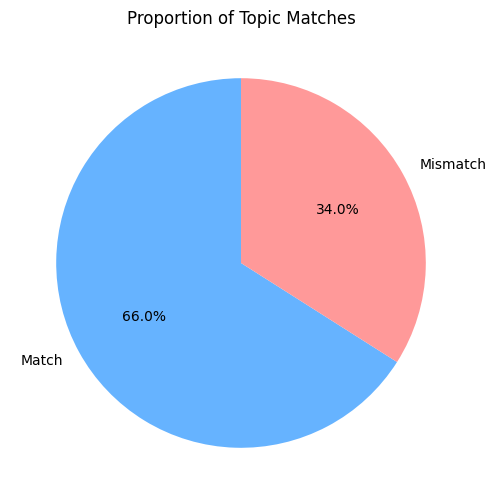

<ipython-input-62-c458db2f91fb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=match_labels, y=match_counts, palette='coolwarm')


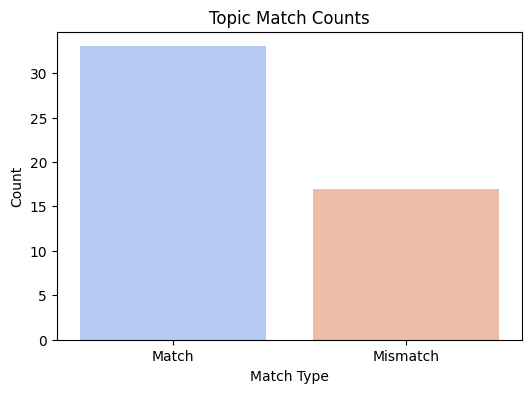

In [ ]:
# Calculating match proportions
match_counts = merged_df['Topic_Match'].value_counts()
match_labels = ['Match', 'Mismatch']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(match_counts, labels=match_labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Proportion of Topic Matches')
plt.show()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=match_labels, y=match_counts, palette='coolwarm')
plt.title('Topic Match Counts')
plt.ylabel('Count')
plt.xlabel('Match Type')
plt.show()


*The output visualizations provide an exploratory analysis of the Topic Match data comparing manually assigned topics with those predicted by the LDA model:*

1. *Pie Chart (Proportion of Topic Matches)*:
   - *This chart displays the proportion of matches and mismatches between manually assigned topics and LDA-predicted topics.*
   - *The chart shows that 66% of the topics match, while 34% mismatch, highlighting the agreement level between manual labeling and model prediction.*

2. *Bar Chart (Topic Match Counts)*:
   - *This chart provides a count-based comparison of matches and mismatches.*
   - *The height of the bars reflects the number of instances for each category:*
     - *Matches: Approximately 33 reviews.*
     - *Mismatches: Approximately 17 reviews.*
   - *This visualization complements the pie chart by providing an absolute count.*

*These visualizations analyze the consistency between manual topic assignments and LDA-predicted topics. The majority of the predictions (66%) align with the manual labels, indicating a reasonable performance of the LDA model. However, the 34% mismatch suggests there is room for improvement, possibly in refining the LDA model parameters or exploring the reasons behind the mismatches (e.g., subjective interpretations of topics or insufficient topic coherence).*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


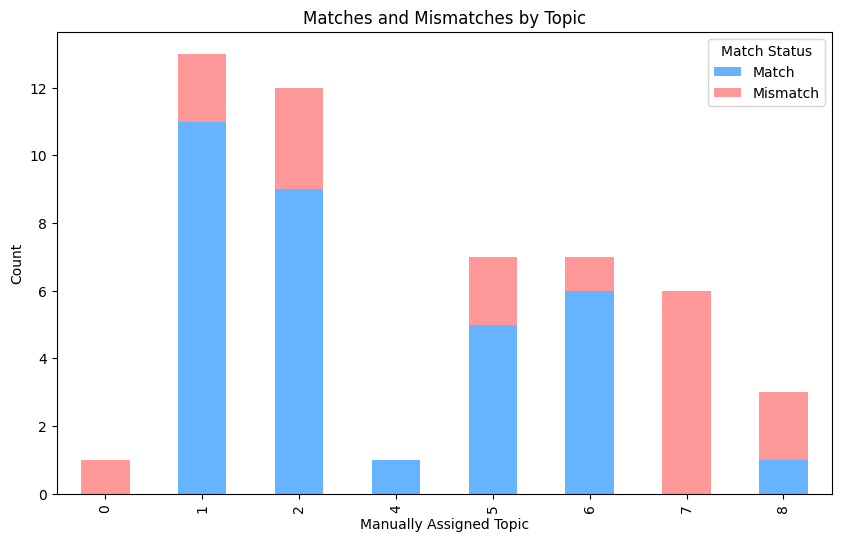

In [ ]:
# Counting matches and mismatches by manually assigned topics
match_by_topic = merged_df.groupby(['Topic', 'Topic_Match']).size().unstack()

# Stacked bar chart
match_by_topic.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff', '#ff9999'])
plt.title('Matches and Mismatches by Topic')
plt.xlabel('Manually Assigned Topic')
plt.ylabel('Count')
plt.legend(['Match', 'Mismatch'], title='Match Status')
plt.show()


*The bar chart visualizes the matches and mismatches between manually assigned topics and LDA-predicted topics for each topic.*

- *X-axis: Represents the manually assigned topic numbers (0 to 8).*
- *Y-axis: Represents the count of reviews for each topic.*
- *Bars: Stacked bars for each topic:*
  - *Blue segment: The count of reviews where the manually assigned topic matches the LDA-predicted topic.*
  - *Red segment**: The count of reviews where the manually assigned topic does not match the LDA-predicted topic.*

*Observations:*
1. *Topics 1 and 2 have the highest number of reviews, with a majority being matches (blue).*
2. *Topics 5 and 6 show a mix of matches and mismatches.*
3. *Topics 7 and 8 have relatively fewer matches and more mismatches (red).*
4. *Topic 0 has very few reviews, with only mismatches.*

*This visualization highlights the alignment of LDA-predicted topics with manually assigned topics across all topics. It shows that some topics, like 1 and 2, have strong alignment (more matches), while others, like 7 and 8, require further investigation to understand the cause of mismatches. This analysis can guide improvements in the topic modeling approach or manual labeling.*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-64-7ecf4a3d7a97>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Topic_Match', y='Top_Topic_Confidence', palette='coolwarm')


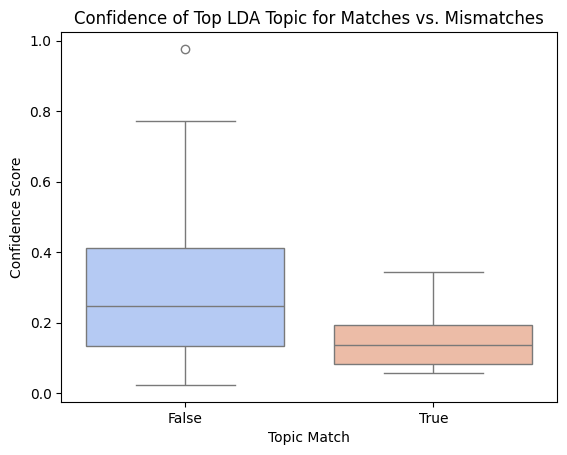

In [ ]:
# Extracting the top topic's confidence score for each document
merged_df['Top_Topic_Confidence'] = merged_df['LDA_Topic'].apply(lambda x: x[0][1] if len(x) > 0 else 0)

# Comparing the confidence for matches and mismatches
sns.boxplot(data=merged_df, x='Topic_Match', y='Top_Topic_Confidence', palette='coolwarm')
plt.title('Confidence of Top LDA Topic for Matches vs. Mismatches')
plt.xlabel('Topic Match')
plt.ylabel('Confidence Score')
plt.show()


*This boxplot visualizes the confidence scores of the top LDA-predicted topic for reviews, comparing matches and mismatches between manually assigned topics and LDA-predicted topics.*

- *X-axis: Indicates whether the predicted topic matches the manually assigned topic:*
  - *True: Represents matches.*
  - *False: Represents mismatches.*
  
- *Y-axis: Represents the confidence scores (probability values) of the top LDA topic for each review.*

- *Boxplot Components:*
  - *The box shows the interquartile range (IQR), i.e., the middle 50% of confidence scores.*
  - *The horizontal line inside the box represents the median confidence score.*
  - *The whiskers extend to the minimum and maximum values within 1.5 times the IQR.*
  - *Outliers are shown as individual points beyond the whiskers.*

*Observations:*
1. *Mismatches (False):*
   - *Median confidence score is higher compared to matches.*
   - *A wider range of confidence scores, including outliers above 0.8.*
   - *Indicates that some mismatched topics have relatively high confidence from the LDA model.*

2. *Matches (True):*
   - *Median confidence score is lower.*
   - *A smaller range of confidence scores compared to mismatches.*
   - *Suggests that matches occur even at lower confidence levels, potentially due to well-aligned topics.*

*The boxplot highlights an inverse trend between topic match status and confidence scores. Mismatched topics often have higher confidence scores, which may indicate overconfidence in incorrect predictions. This insight can help refine the LDA model by addressing cases of high-confidence mismatches to improve overall topic assignment accuracy.*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-65-e9cb3da22643>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Topic', palette='viridis')


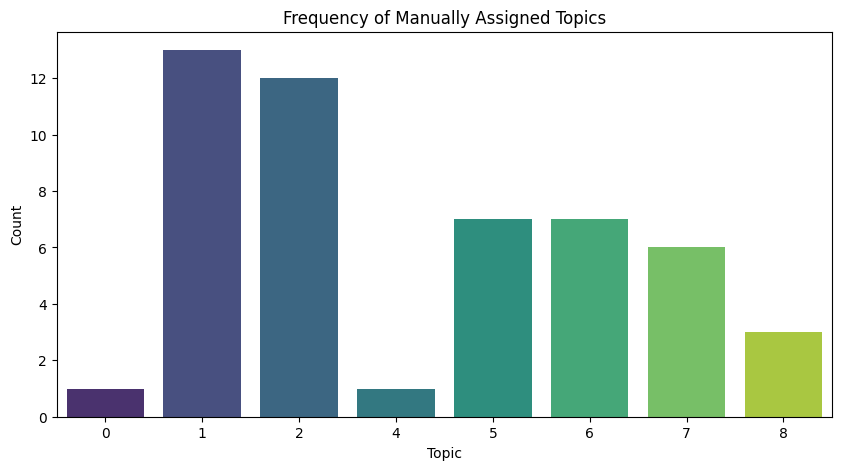

<ipython-input-65-e9cb3da22643>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=lda_top_topics, palette='viridis')


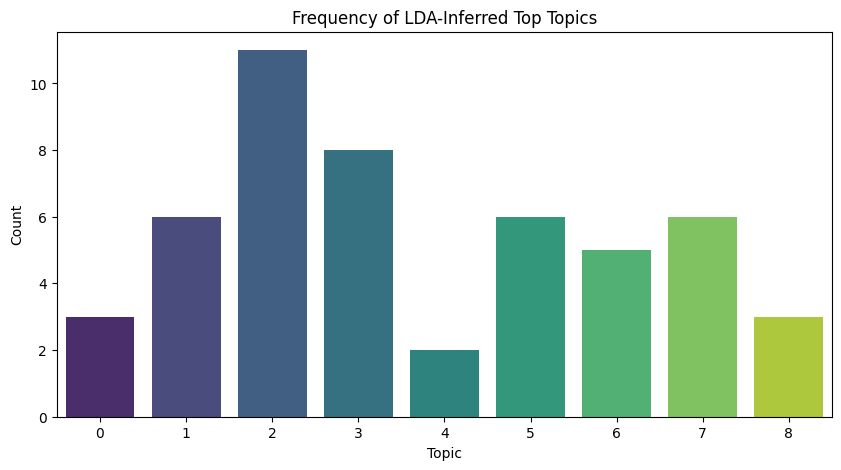

In [ ]:
# Frequency of manually assigned topics
plt.figure(figsize=(10, 5))
sns.countplot(data=merged_df, x='Topic', palette='viridis')
plt.title('Frequency of Manually Assigned Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

# Frequency of top LDA topics
lda_top_topics = [max(topics, key=lambda x: x[1])[0] for topics in merged_df['LDA_Topic']]
plt.figure(figsize=(10, 5))
sns.countplot(x=lda_top_topics, palette='viridis')
plt.title('Frequency of LDA-Inferred Top Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()



*First Plot: Frequency of Manually Assigned Topics
This bar plot visualizes the distribution of manually assigned topics among the sample reviews. Each bar represents the frequency of a specific topic as manually assigned by the user. The distribution shows that:*
- *Topics 1 and 2 are the most frequently assigned topics.*
- *Topics 4 and 8 have relatively lower occurrences, indicating less manual assignment for these topics.*

*Second Plot: Frequency of LDA-Inferred Top Topics*
*This bar plot visualizes the distribution of topics as inferred by the LDA model for the same set of sample reviews. The LDA model assigns the topic with the highest confidence score to each review. Observations include:*
- *Topics 2 and 5 are the most frequently inferred by the model.*
- *Topic 4 has the least frequency, similar to the manually assigned topics.*

*Comparison*
- *Both distributions show some alignment, especially with frequent topics such as 2 and 5.*
- *However, some topics (e.g., 1) are more prevalent in manual assignments compared to LDA-inferred results, suggesting potential mismatches or differences in topic interpretation between human and model.*

*These plots highlight the alignment and discrepancies between manually assigned topics and LDA-inferred topics. While there is some overlap in prevalent topics, variations suggest areas where the LDA model might need further tuning to match manual expectations or where human interpretations of topics differ from automated results. This comparison is valuable for evaluating the performance of the LDA model against human judgment.*

In [ ]:
# Calculating agreement accuracy
agreement_accuracy = (merged_df['Topic_Match'].sum() / len(merged_df)) * 100

print(f"Agreement Accuracy: {agreement_accuracy:.2f}%")

Agreement Accuracy: 66.00%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*The agreement accuracy of 66% suggests moderate alignment between the manually assigned topics and the LDA model's predictions. This result indicates that the model is fairly effective but has room for improvement to align more closely with human judgment. This metric is useful for assessing the reliability of the topic modeling process.*

In [ ]:
# Extracting the dominant topic from LDA topics (the topic with the highest probability) for each review
merged_df['Dominant_LDA_Topic'] = merged_df['LDA_Topic'].apply(lambda x: max(x, key=lambda item: item[1])[0])

# Comparing the manually assigned topic with the dominant LDA topic
merged_df['Topic_Match'] = merged_df['Topic'] == merged_df['Dominant_LDA_Topic']

# Display the merged DataFrame with the comparison
merged_df[['Row_Num', 'Dominant_LDA_Topic', 'Topic', 'Topic_Match']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Row_Num,Dominant_LDA_Topic,Topic,Topic_Match
0,2718,1,2,False
1,4275,0,0,True
2,4141,3,2,False
3,1199,5,5,True
4,4546,1,2,False
5,233,5,2,False
6,1618,2,1,False
7,296,2,2,True
8,5407,4,2,False
9,5255,3,5,False


*This code highlights the comparison between the dominant topic predicted by the LDA model and the manually assigned topic. It provides a clearer way to assess the LDA model's accuracy by focusing only on the most confident prediction for each review. This approach refines the earlier matching logic and enables more accurate evaluation of the model's performance.*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-69-59722e851cf7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dominant_topic_counts.index, y=dominant_topic_counts.values, palette='viridis')


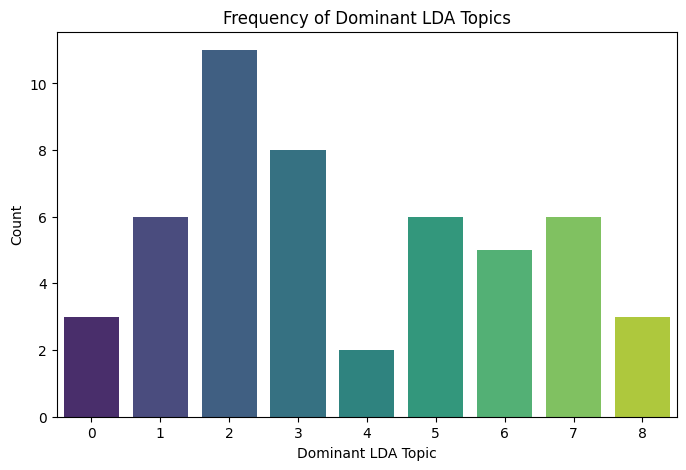

In [ ]:
# Calculating the frequency of Dominant LDA Topics
dominant_topic_counts = merged_df['Dominant_LDA_Topic'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=dominant_topic_counts.index, y=dominant_topic_counts.values, palette='viridis')
plt.title('Frequency of Dominant LDA Topics')
plt.xlabel('Dominant LDA Topic')
plt.ylabel('Count')
plt.show()


*This bar chart visualizes the frequency of Dominant LDA Topics across the dataset.*

1. *X-Axis: Represents the dominant LDA topics (Topic 0 to Topic 8).*
2. *Y-Axis: Indicates the count of reviews associated with each dominant topic.*
3. *Dominant LDA Topic: For each document, the LDA model identifies the topic with the highest probability as the dominant topic.*

*Observations:*
- *Topic 2 is the most frequent dominant topic, with the highest count among all topics.*
- *Topic 4 is the least frequent dominant topic, indicating that it is rarely the primary topic of the reviews.*
- *Other topics, such as Topics 1, 3, 5, 6, and 7, show moderate frequencies, suggesting a balanced distribution across some topics.*
- *Topics 0 and 8 have relatively low frequencies, indicating that they are less likely to be the dominant topic for most reviews.*

*The chart highlights the distribution of dominant topics across the dataset, with Topic 2 being the most prevalent. This can provide insights into the general themes or topics the reviews are focused on. The imbalance in frequencies might suggest that certain topics are more relevant to the dataset, while others are less significant.*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


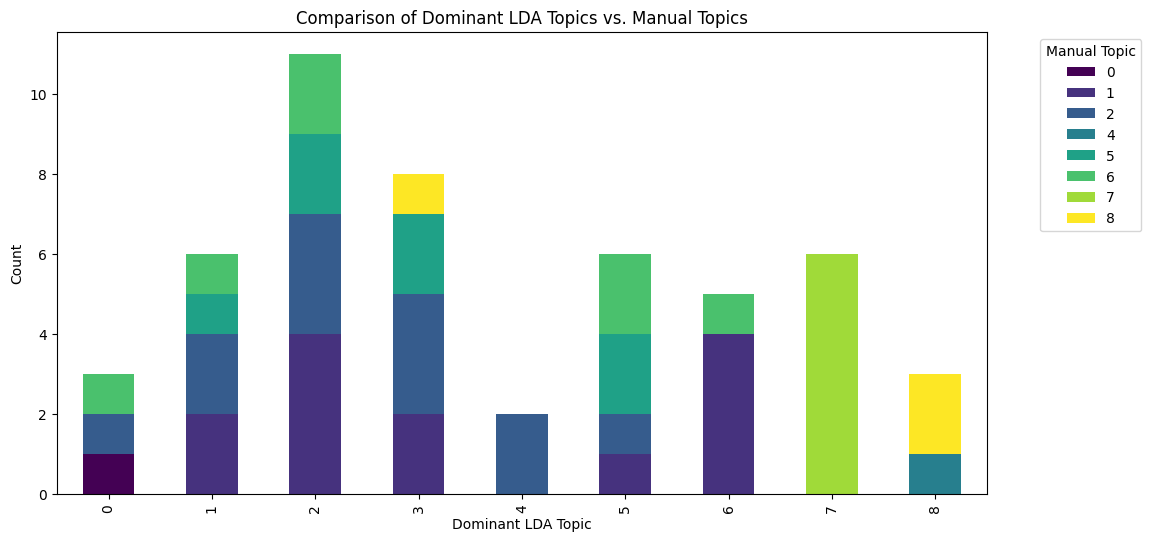

In [ ]:
# Group by Dominant LDA Topic and Manual Topic
comparison_counts = merged_df.groupby(['Dominant_LDA_Topic', 'Topic']).size().unstack(fill_value=0)

comparison_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Comparison of Dominant LDA Topics vs. Manual Topics')
plt.xlabel('Dominant LDA Topic')
plt.ylabel('Count')
plt.legend(title='Manual Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


*This stacked bar chart visualizes the comparison between the dominant LDA topics (topics inferred by the LDA model) and the manual topics (topics manually assigned to reviews) for each review document.*

1. *X-Axis: Represents the dominant LDA topics (Topic 0 to Topic 8).*
2. *Y-Axis: Indicates the count of reviews associated with each dominant topic.*
3. *Stacked Bars: Each bar is segmented based on the manual topic assigned to the reviews that have the given dominant LDA topic.*

*Observations:*
- *Dominant Topic 2 has the highest count, and the reviews under this topic are manually classified into various manual topics, showing a mix of classifications.*
- *Dominant Topics 5, 6, and 7 show a more concentrated distribution, indicating some alignment between the LDA-inferred topics and the manual topics.*
- *Dominant Topic 4 has the fewest reviews and exhibits less diversity in manual topic alignment.*
- *There is a noticeable mismatch in several cases where manual topics do not strongly align with the LDA-inferred dominant topic.*

*The chart highlights the relationship and discrepancies between LDA-inferred topics and manually assigned topics. It provides a visual representation of how the LDA model's dominant topics correlate with human interpretation, illustrating areas of agreement (alignment) and divergence (misclassification). This comparison can be used to assess the performance and interpretability of the LDA model.*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


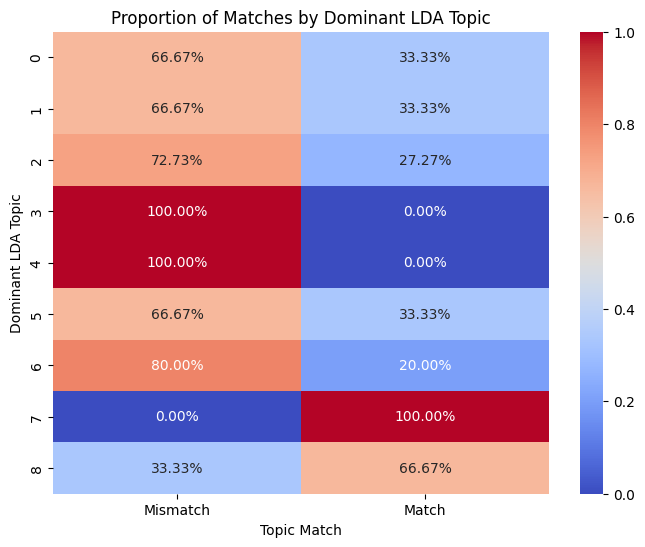

In [ ]:
# Calculating the proportion of matches by Dominant LDA Topic
heatmap_data = merged_df.groupby(['Dominant_LDA_Topic', 'Topic_Match']).size().unstack(fill_value=0)

# Normalizing rows to percentages
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_normalized, annot=True, fmt=".2%", cmap="coolwarm", cbar=True)
plt.title('Proportion of Matches by Dominant LDA Topic')
plt.xlabel('Topic Match')
plt.ylabel('Dominant LDA Topic')
plt.xticks([0.5, 1.5], ['Mismatch', 'Match'])
plt.show()


*This heatmap visualizes the proportion of matches and mismatches for each dominant LDA topic inferred by the model.*

1. *Y-Axis: Represents the Dominant LDA Topics (0 to 8).*
2. *X-Axis: Represents the Topic Match categories:*
   - *Match: The dominant LDA topic matches the manually assigned topic.*
   - *Mismatch: The dominant LDA topic does not match the manually assigned topic.*
3. *Cell Values: Show the percentage of reviews within each dominant LDA topic that were classified as a match or mismatch.*
4. *Color Gradient: Indicates the proportion, where darker red shows higher proportions of mismatches, and darker blue indicates higher proportions of matches.*

*Observations:*
- *Topics 3 and 4 have 100% mismatches, indicating no manual topics align with these LDA-inferred dominant topics.*
- *Topic 7 shows 100% matches, suggesting excellent agreement between the manual assignments and the LDA model for this topic.*
- *Topic 8 shows a higher proportion of matches (66.67%) compared to mismatches (33.33%).*
- *Other topics, such as 0, 1, 2, 5, and 6, show a mix of matches and mismatches, with mismatches dominating most of these topics.*

*The heatmap highlights the effectiveness and limitations of the LDA model in aligning its inferred dominant topics with manually assigned topics. Some topics (e.g., Topic 7) demonstrate perfect alignment, while others (e.g., Topics 3 and 4) fail to align with manual classifications, indicating potential issues with either the LDA topic granularity or manual labeling consistency. This visualization is a helpful tool for diagnosing and improving the topic modeling approach.*

In [ ]:
# Calculating the agreement accuracy
agreement_accuracy = merged_df['Topic_Match'].mean()

print(f'Agreement Accuracy: {agreement_accuracy * 100:.2f}%')

Agreement Accuracy: 34.00%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*The agreement accuracy demonstrates that the LDA model's predicted topics align with the manually assigned topics in about one-third of the cases. This low agreement suggests that the LDA model's ability to infer dominant topics needs improvement or that manual labeling criteria may not perfectly align with the model's learned representations. Further analysis or tuning might be necessary to improve this alignment.*